In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import dataAgglomeration as da
from matplotlib import rcParams
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.lines import Line2D
import random
rcParams["figure.dpi"] = 400
import sys
print(sys.path)

['/work/groups/da_mma_b/jun/TwoPhaseFlow/run/nonOrthog/tiledBox', '', '/work/projects/project01456/pyfoam/lib64/python3.6/site-packages', '/home/jl95muce/.local/lib/python3.9/site-packages', '/work/groups/da_mma_b/jun/TwoPhaseFlow/run/nonOrthog/tiledBox', '/work/groups/da_mma_b/jun/TwoPhaseFlow/scripts/modules', '/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.9.5/lib/python39.zip', '/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.9.5/lib/python3.9', '/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.9.5/lib/python3.9/lib-dynload', '/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.9.5/lib/python3.9/site-packages', '/shared/apps/.gcc/9.2/.openmpi/4.0/python/3.9.5/lib/python3.9/site-packages/IPython/extensions', '/work/home/jl95muce/.ipython']


In [81]:
Line2D.markers.keys()

dict_keys(['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', ''])

In [72]:
def plot_magU(dframe, meshType, yDeg):
    resolutions = dframe.index.get_level_values("resolution").unique()
    nonOrthogControls =dframe.index.get_level_values("nonOrthogControl").unique()
    #gravityModels = ['gravityReconImprove'] #dframe.index.get_level_values("gravityModel").unique()#[gravityModel] #['gravityRecon', 'gravityReconImprove', 'gravityReconImproveCP'] #
    yRotateDegs = [yDeg]#dframe.index.get_level_values("yRotateDeg").unique()#['gravity', 'gravityDirac', 'gravityRecon']
    marker_list = list(Line2D.markers.keys()) #['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
    
    for yRotateDeg in yRotateDegs:
        marker = random.choice(marker_list)
        for resolution in resolutions:
            for nonOrthogControl in nonOrthogControls:
                #df = dframe.loc[(model,nonOrthogControl,meshType),:]
                df = dframe.loc[(nonOrthogControl,meshType, resolution, yRotateDeg),:]
                plt.plot(df["Time"],df["max(U)"], label="controlMethod %s; N %s" % (nonOrthogControl,resolution), marker=marker)

    plt.title("static sphere; %s" % (meshType))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
    plt.xlabel(r"time $(s)$")
    plt.ylabel(r"max $(|\mathbf{v}|)$")
    plt.yscale("log")
    plt.show()

In [75]:
agglomerator = da.data_agglomerator("tiltedBox3D.parameter","postProcessing/maxU/0/fieldMinMax.dat", 
                                     "./interFlow-tiltedBox3D_00000_template")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("interFlow_titledBox.csv")
dframe_magU = agglomerator.study_dataframe()
dframe_magU = dframe_magU.sort_index()
idx = pd.IndexSlice

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[['ERCNOC', 'PIMPLE'], ['blockMesh', 'perturbMesh', 'polyMesh'], [30, 60, 90], [0, 15], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['nonOrthogControl', 'meshType', 'resolution', 'yRotateDeg', 'step']


In [76]:
dframe_magU

Time        min(U)  \
nonOrthogControl meshType  resolution yRotateDeg step                           
ERCNOC           blockMesh 30         0          0     0.000120  2.086076e-15   
                                                 1     0.000266  4.604364e-15   
                                                 2     0.000440  7.615578e-15   
                                                 3     0.000647  4.523070e-15   
                                                 4     0.000894  2.453588e-15   
...                                                         ...           ...   
PIMPLE           polyMesh  90         15         115   0.097333  8.802471e-12   
                                                 116   0.098000  1.031065e-11   
                                                 117   0.098667  8.658600e-12   
                                                 118   0.099333  7.054653e-12   
                                                 119   0.100000  5.577229e-12   

                                                             max(U)  
nonOrthogControl meshType  resolution yRotateDeg step                
ERCNOC           blockMesh 30         0          0     3.603274e-12  
                                                 1     7.948396e-12  
                                                 2     1.314702e-11  
                                                 3     2.873174e-11  
                                                 4     4.719556e-11  
...                                                             ...  
PIMPLE           polyMesh  90         15         115   7.537071e-01  
                                                 116   7.416214e-01  
                                                 117   7.297758e-01  
                                                 118   7.176598e-01  
                                                 119   7.056678e-01  

[1676 rows x 3 columns]

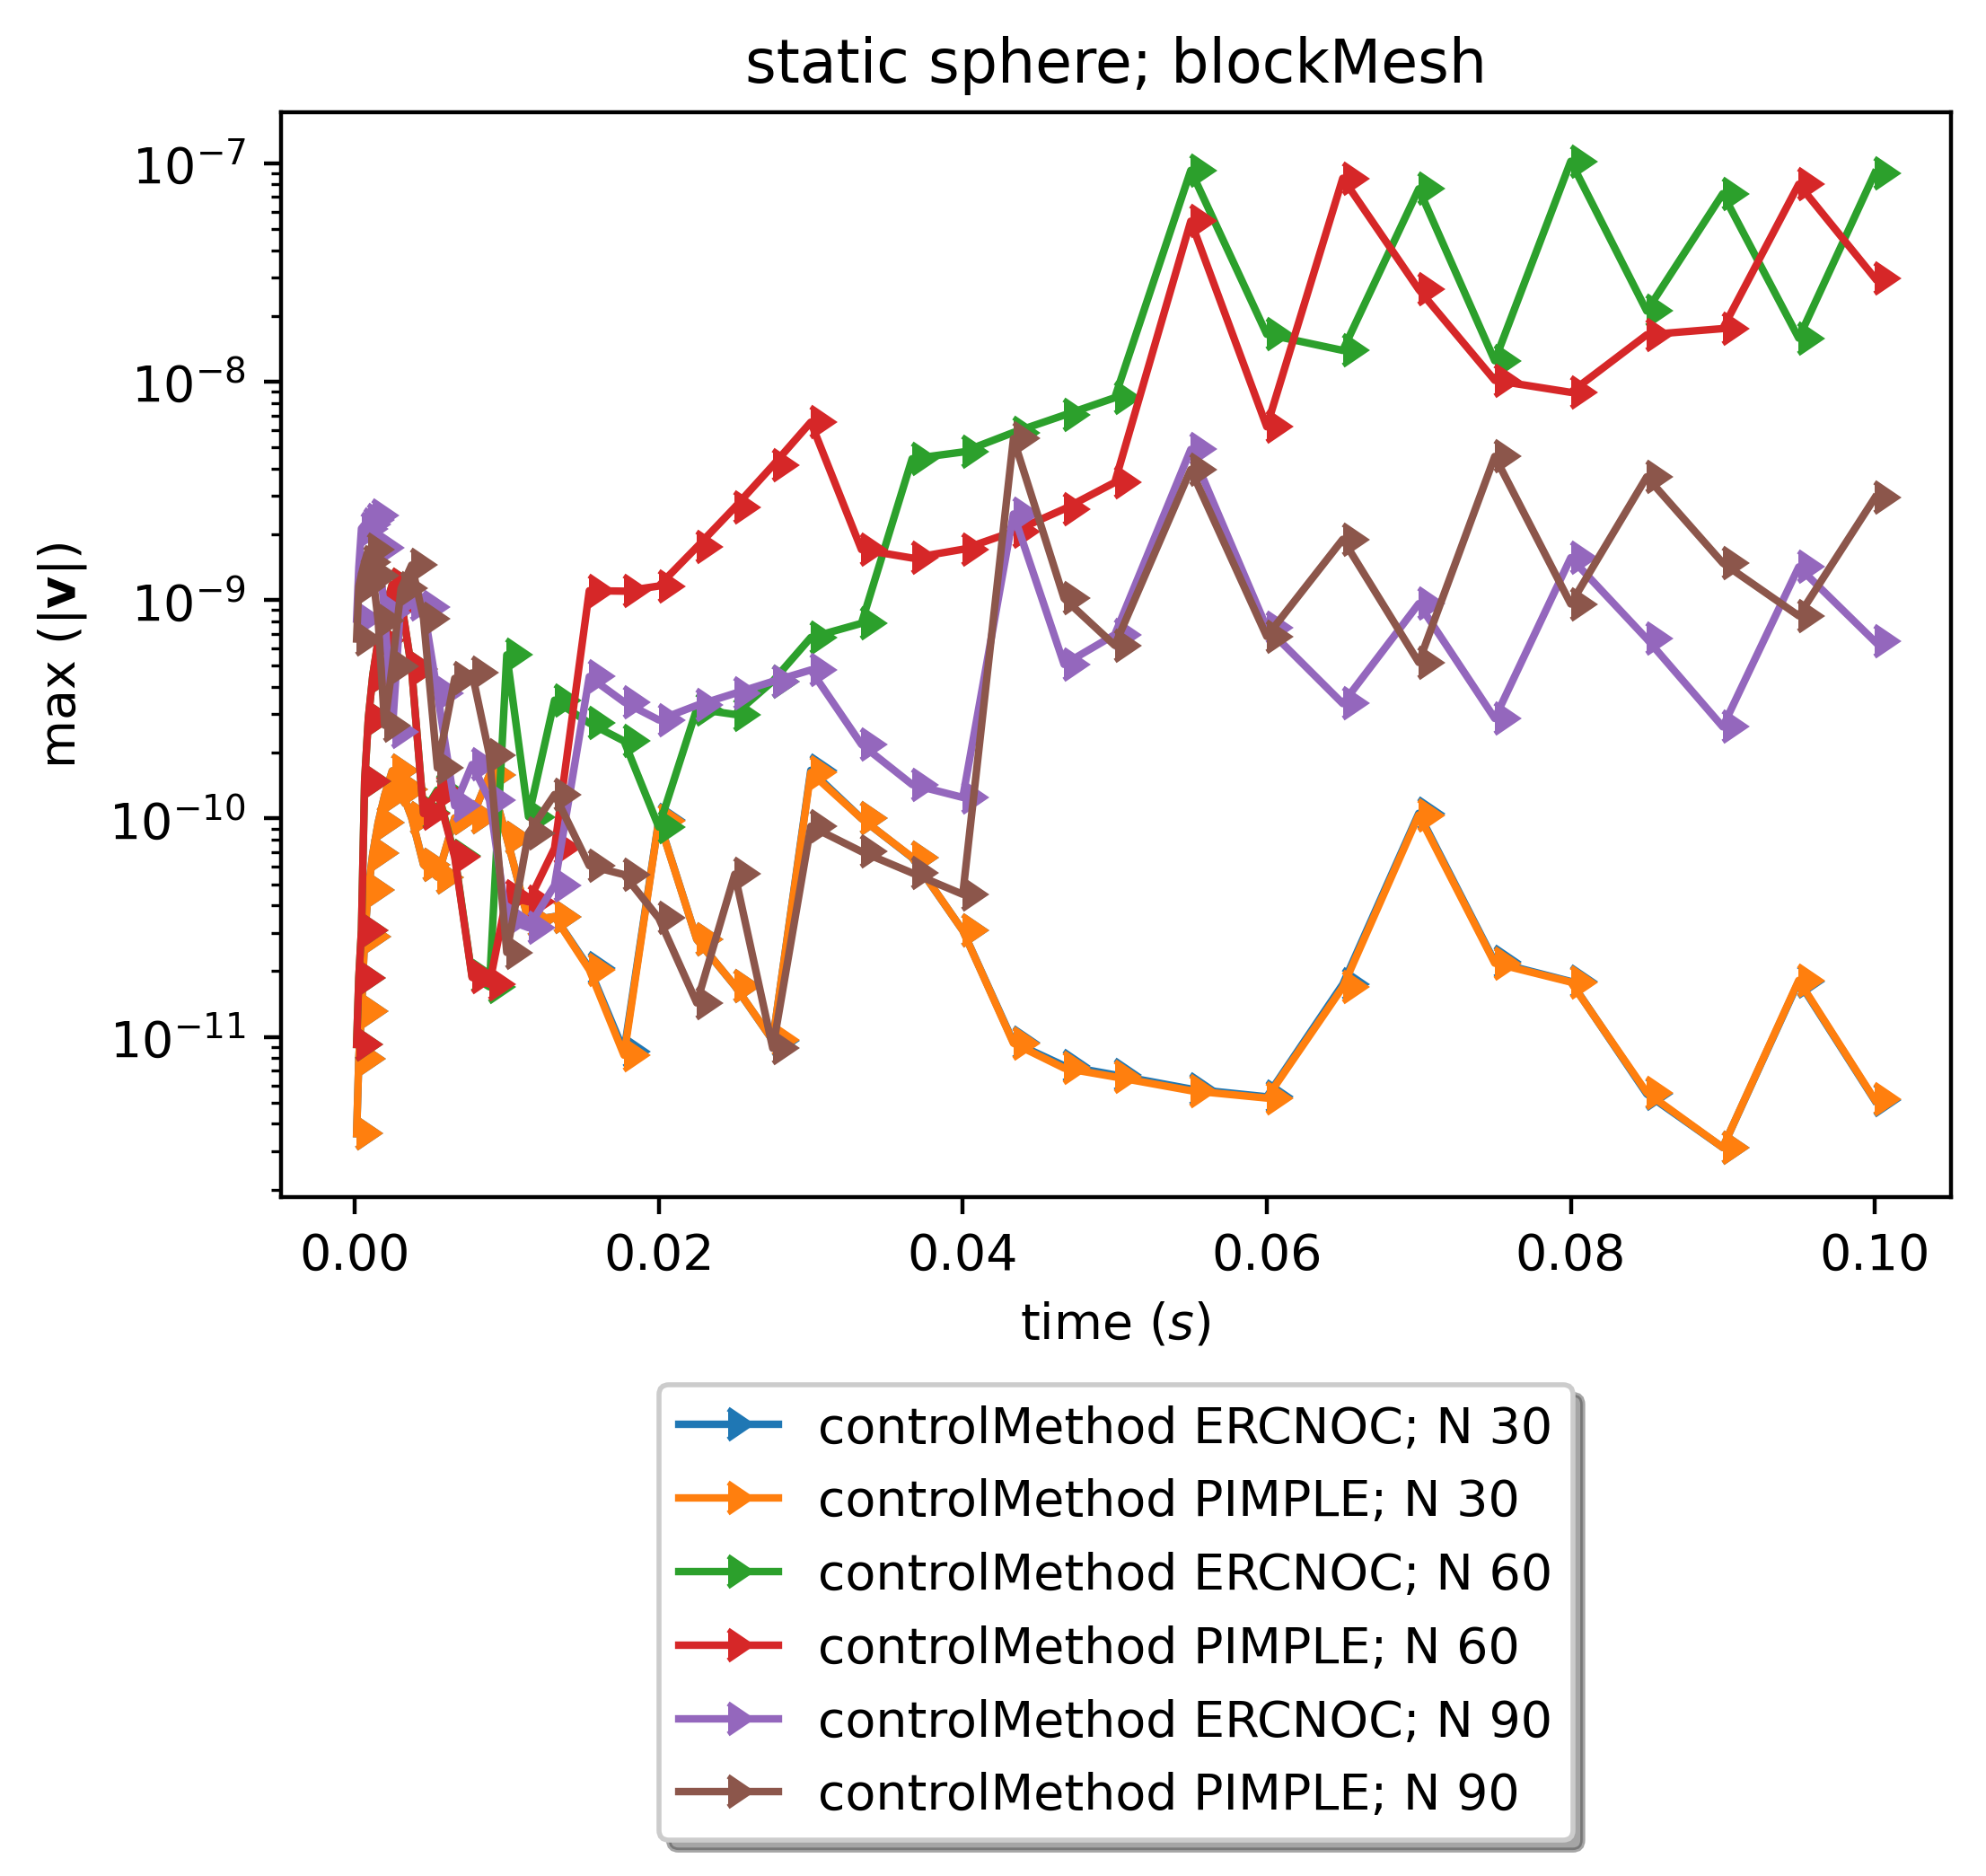

In [77]:
plot_magU(dframe_magU,"blockMesh",0)

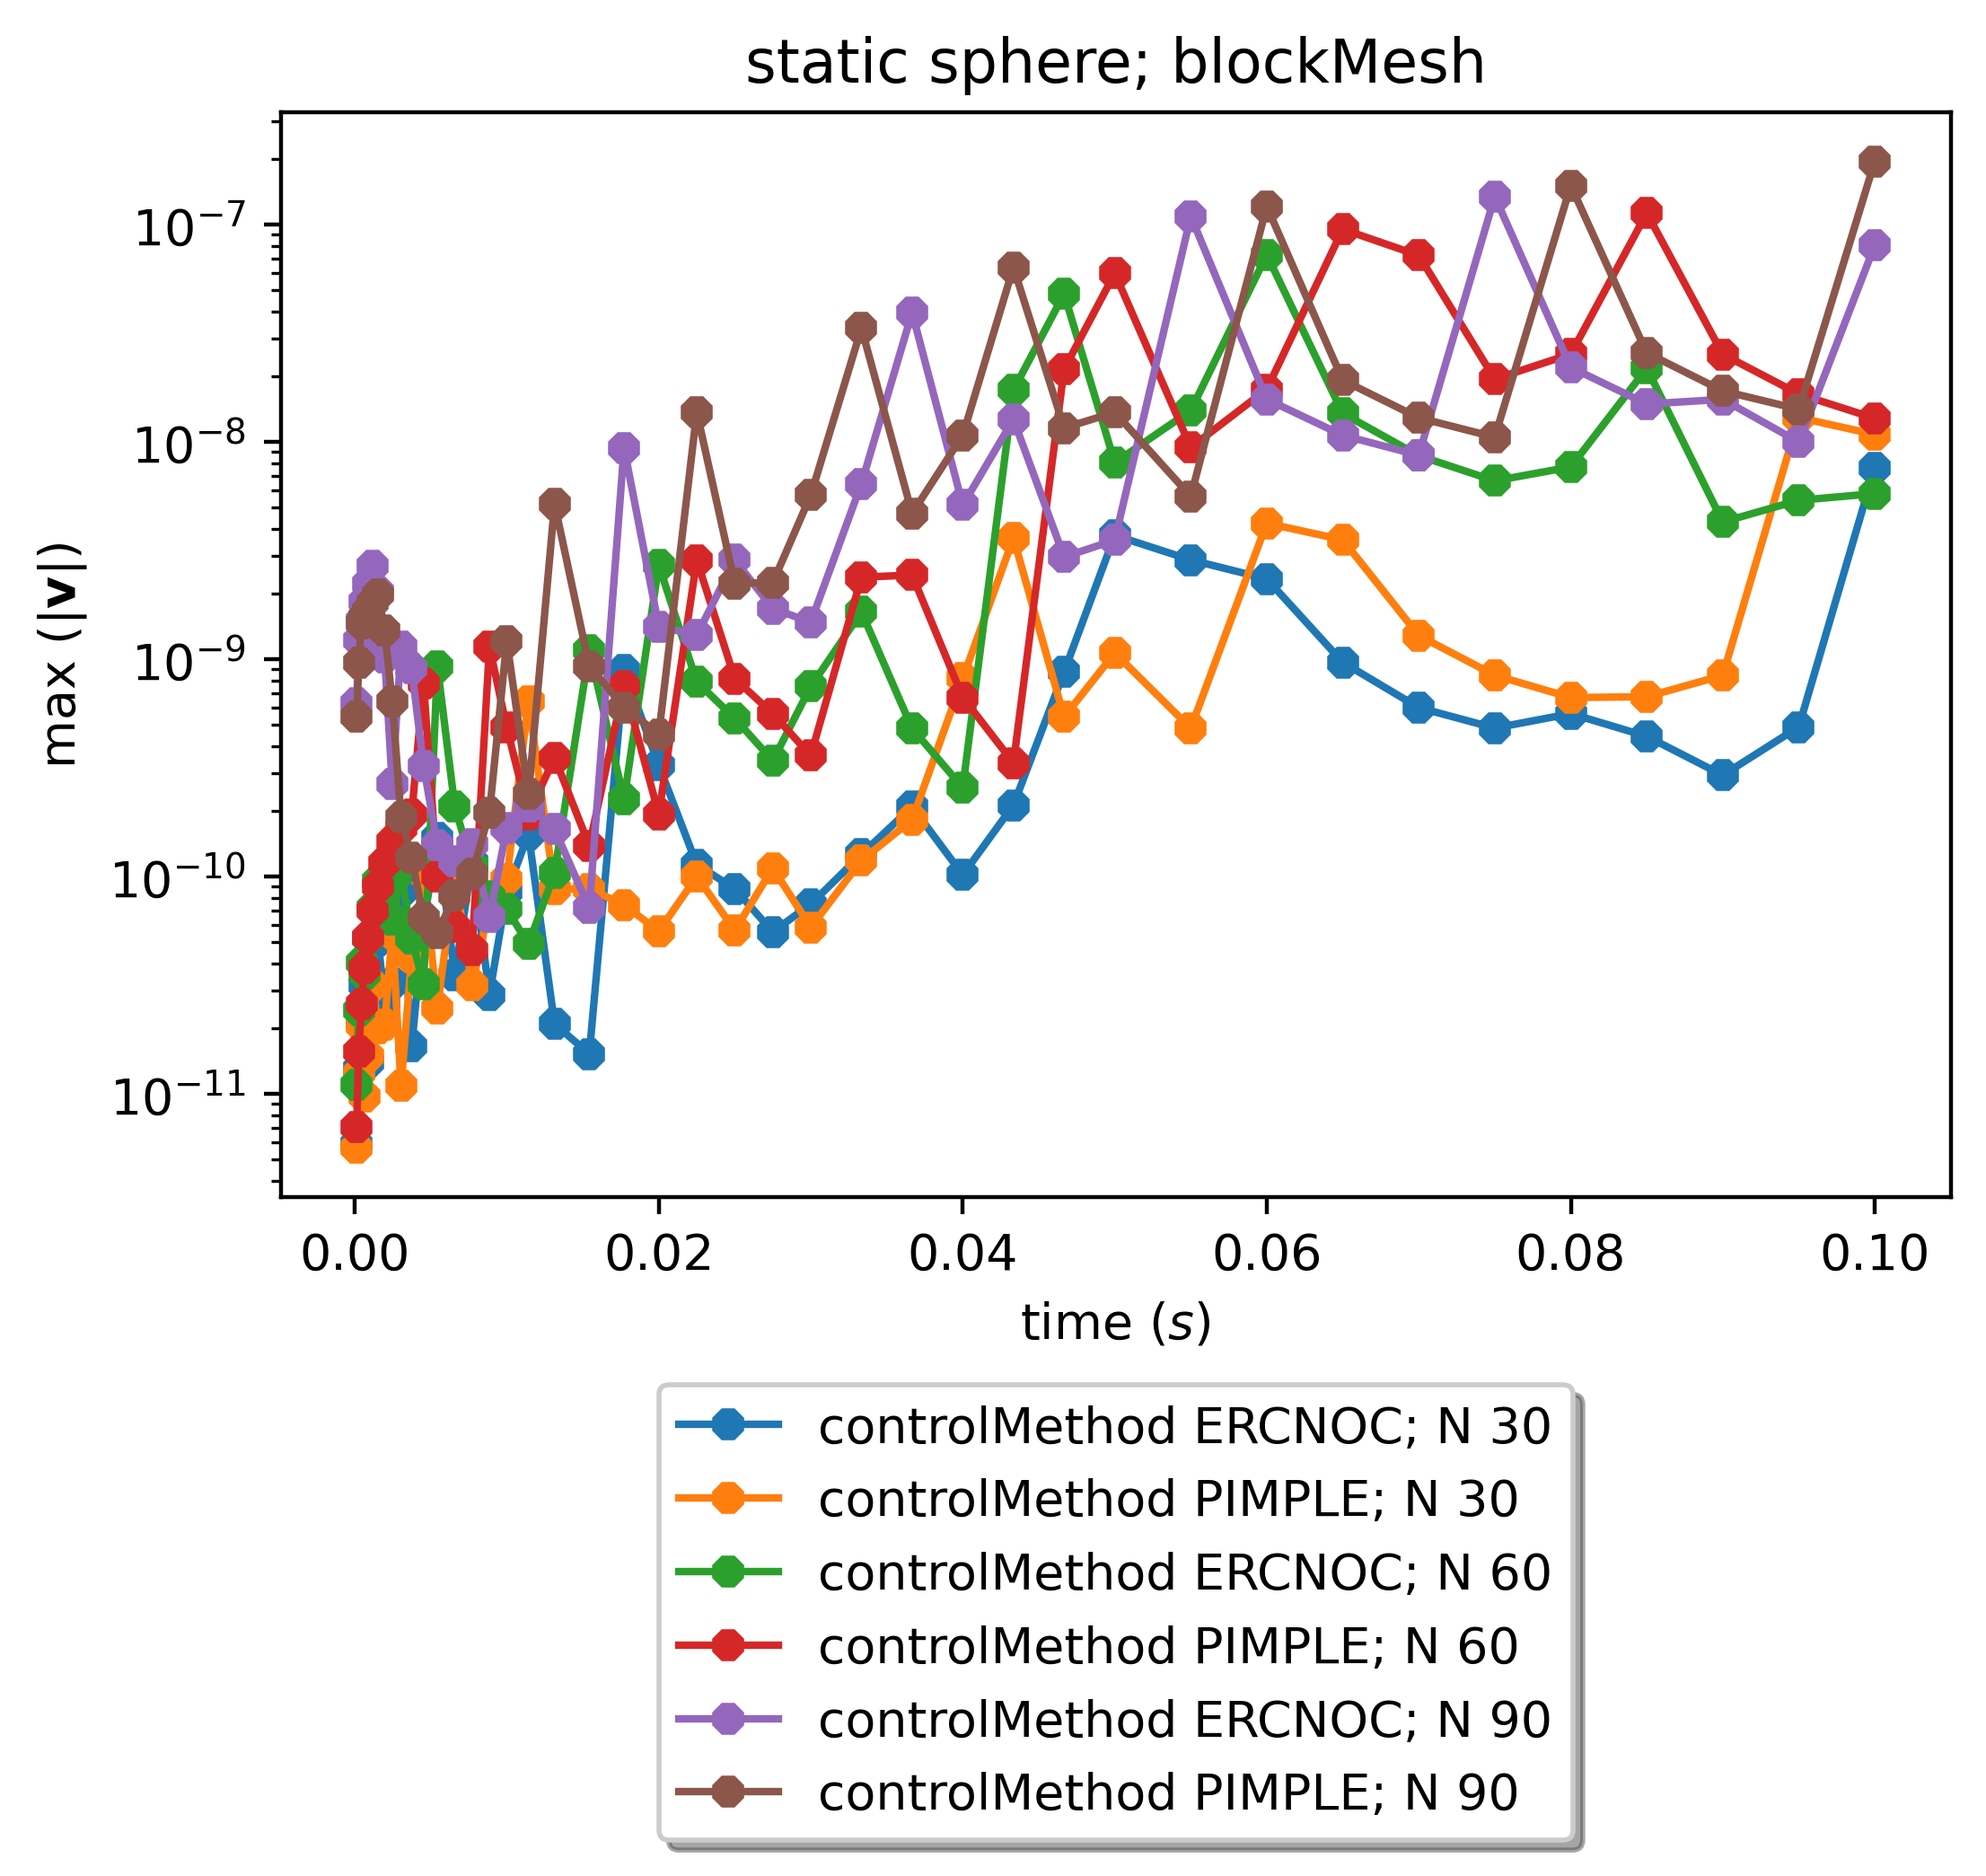

In [80]:
plot_magU(dframe_magU,"blockMesh",15)

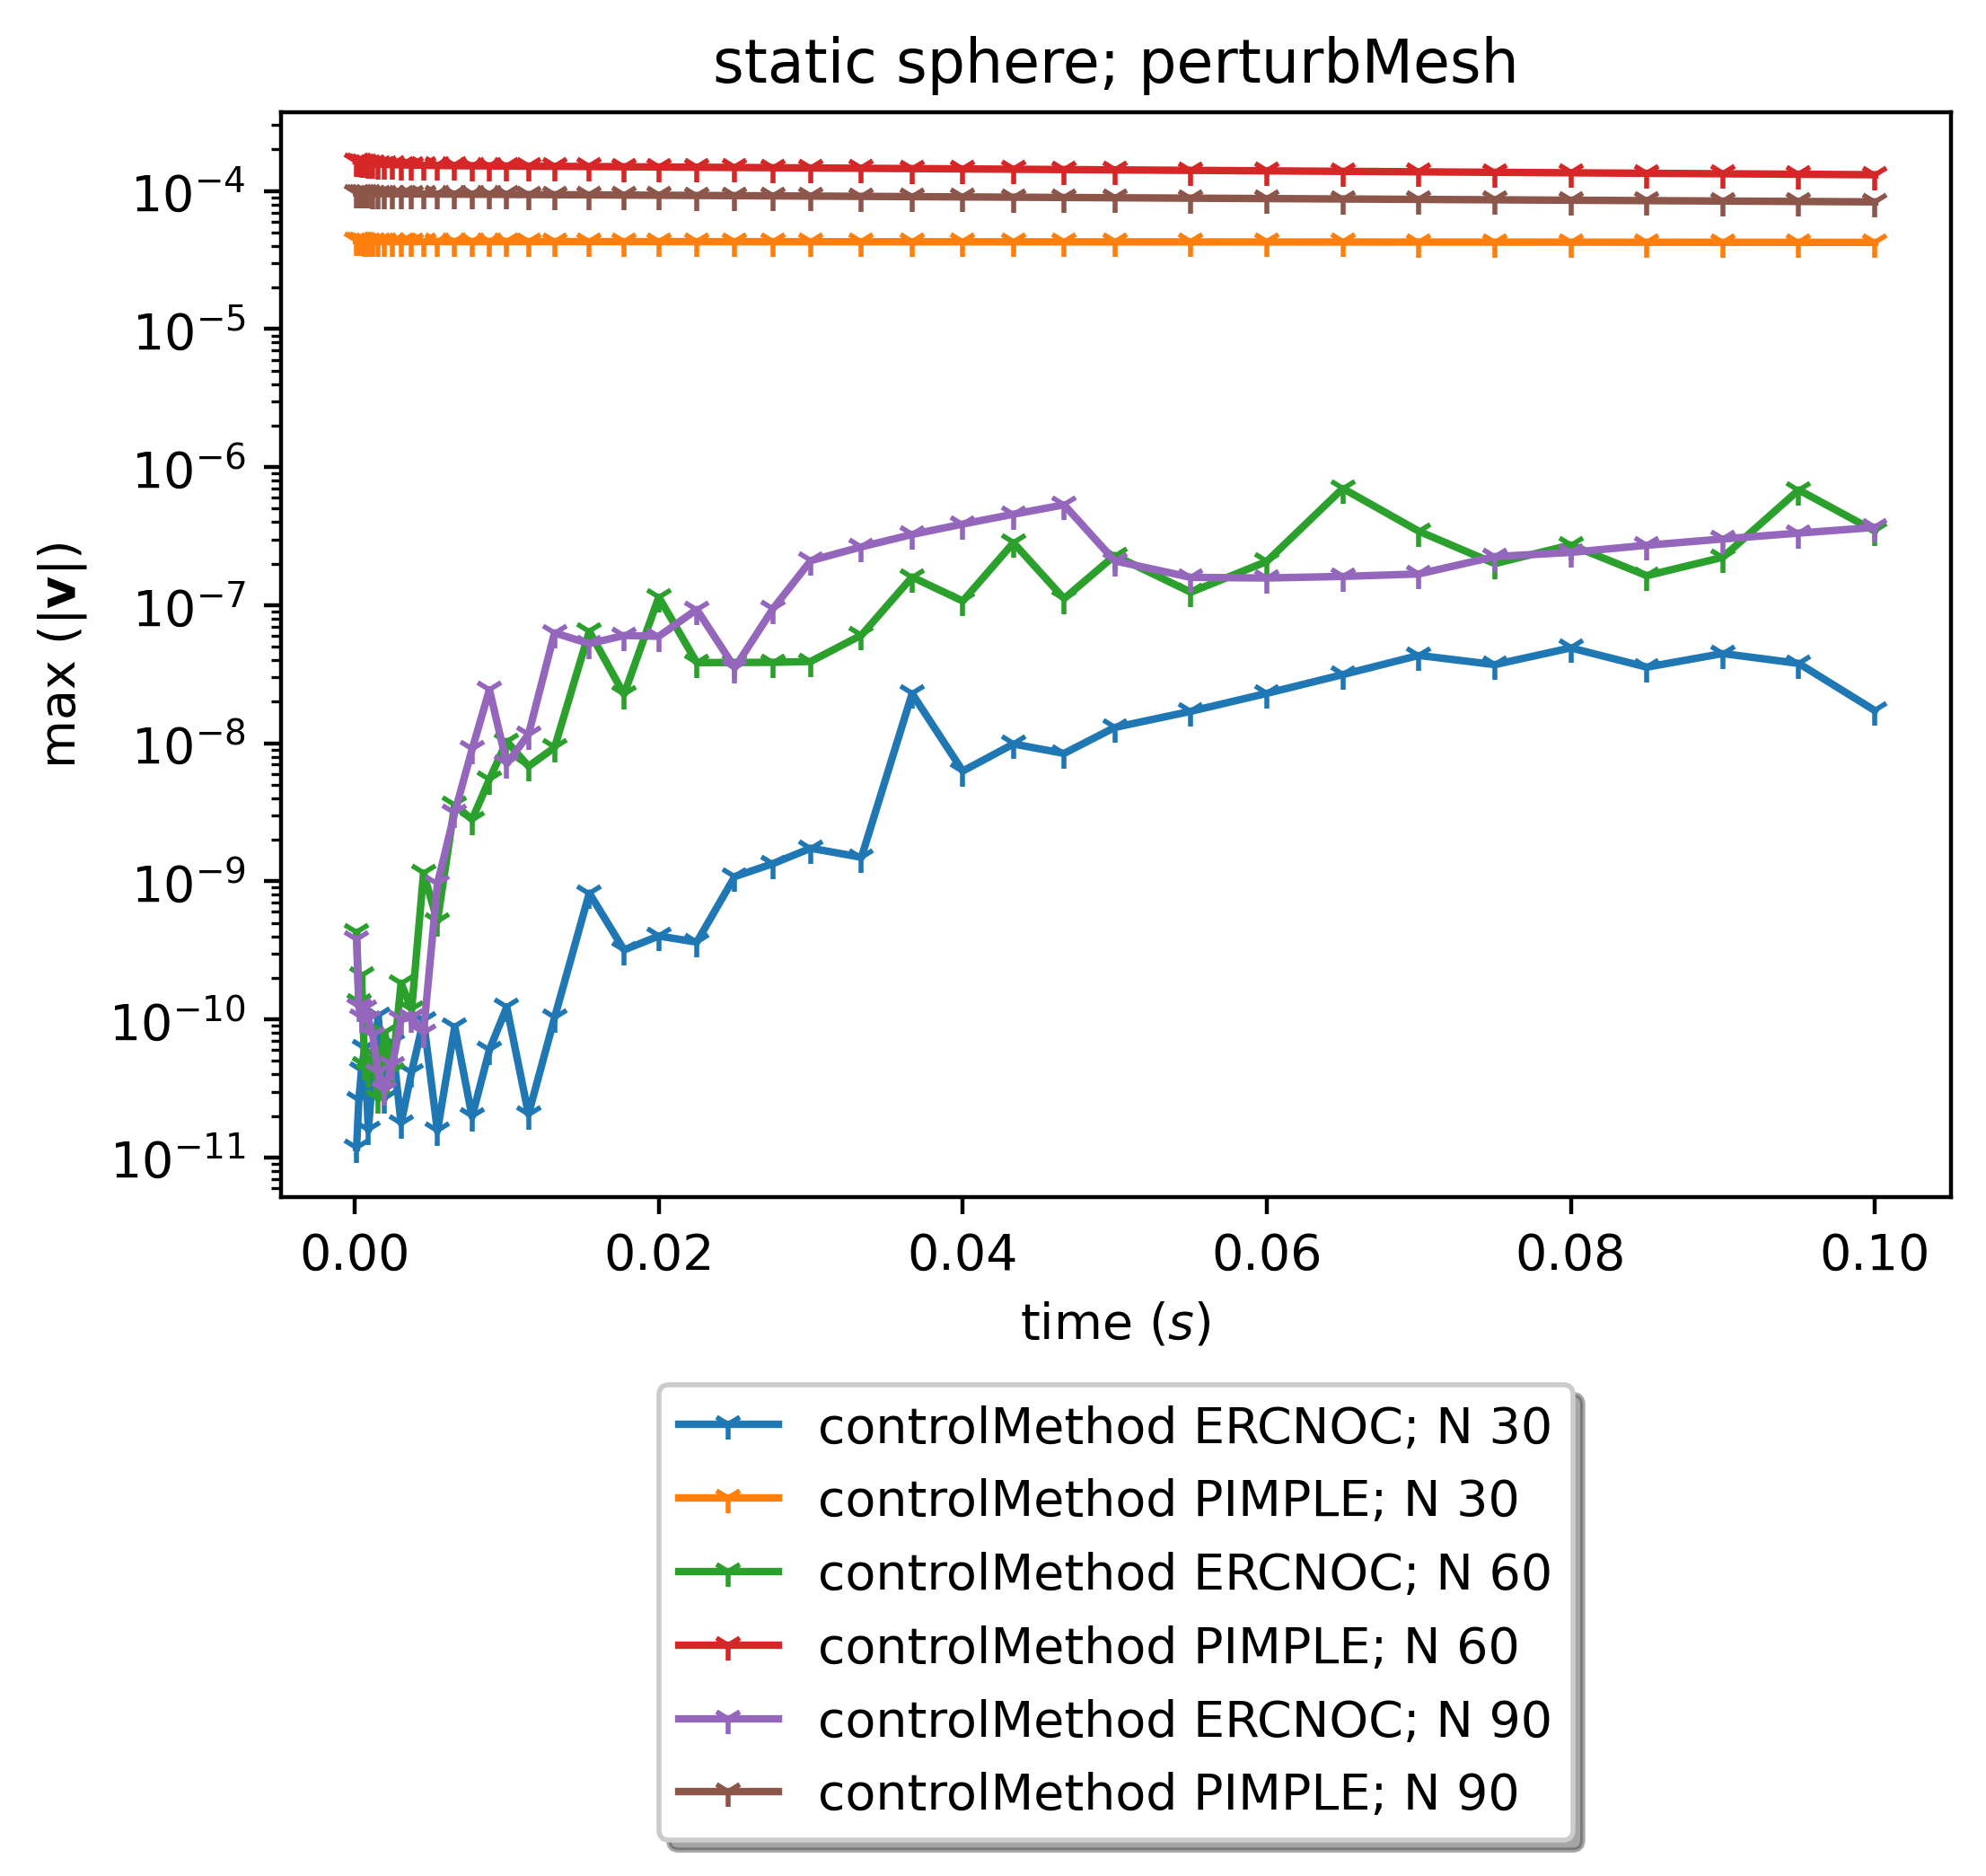

In [78]:
plot_magU(dframe_magU,"perturbMesh",0)

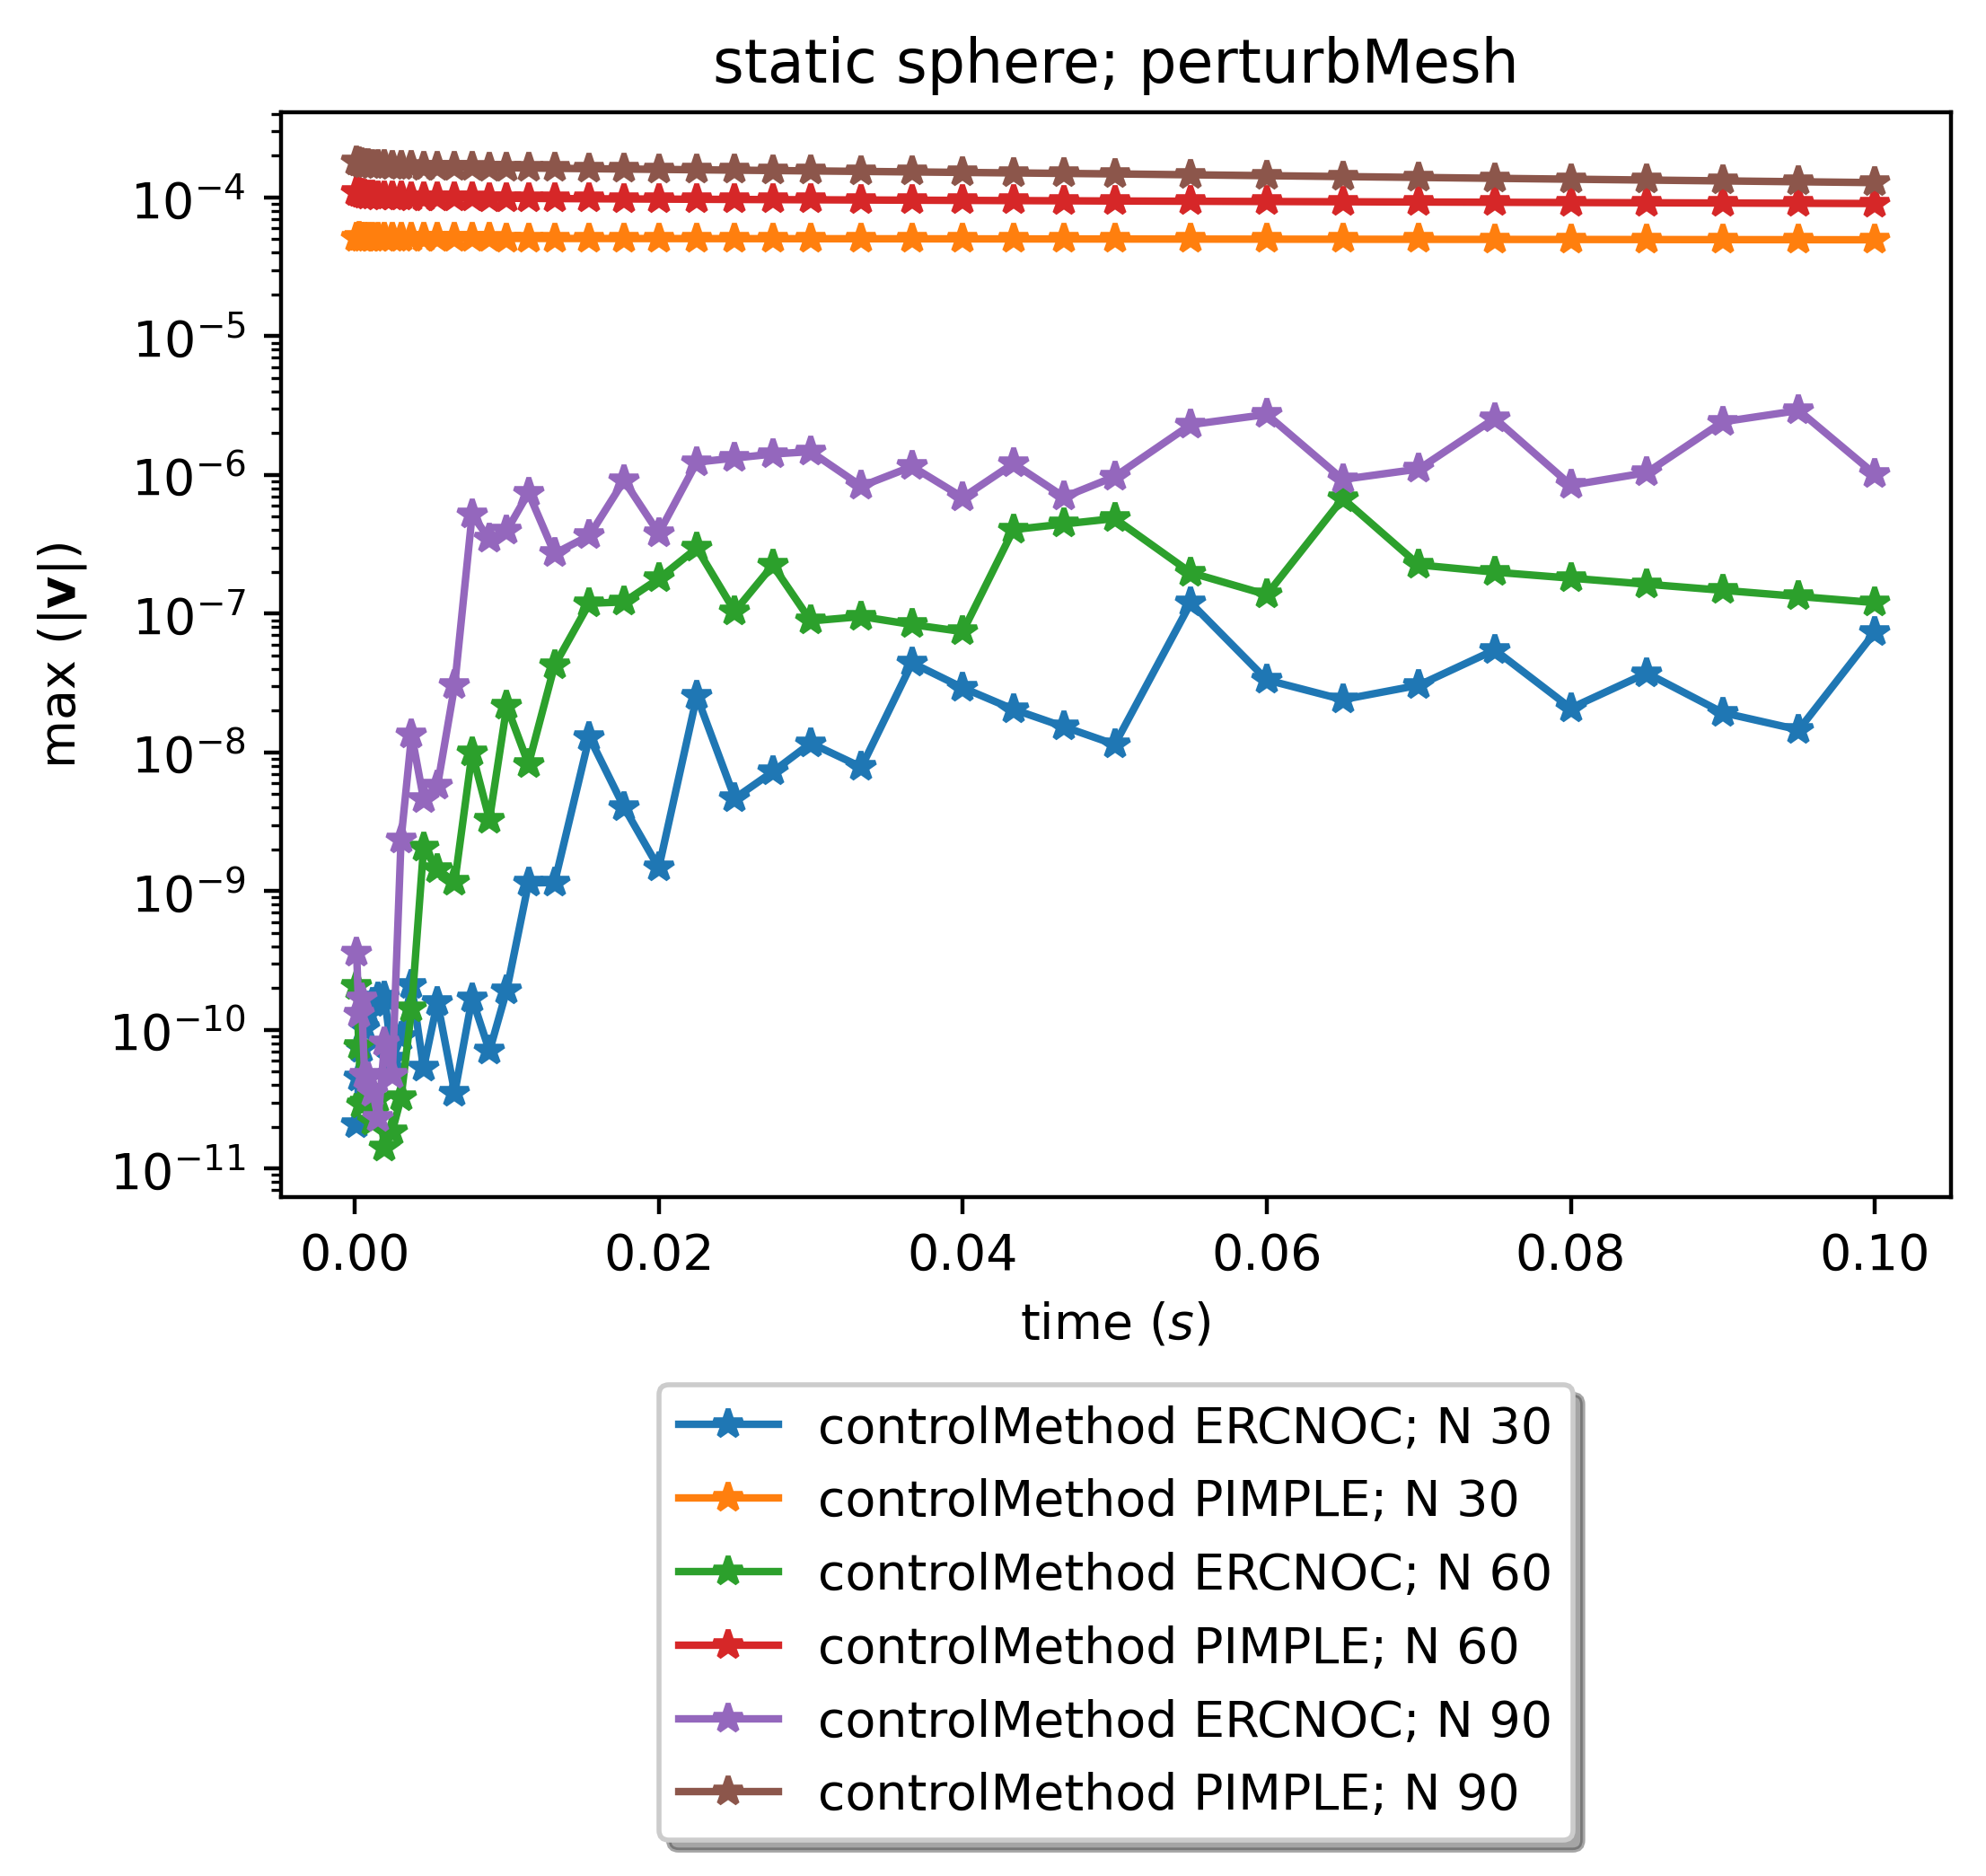

In [81]:
plot_magU(dframe_magU,"perturbMesh",15)

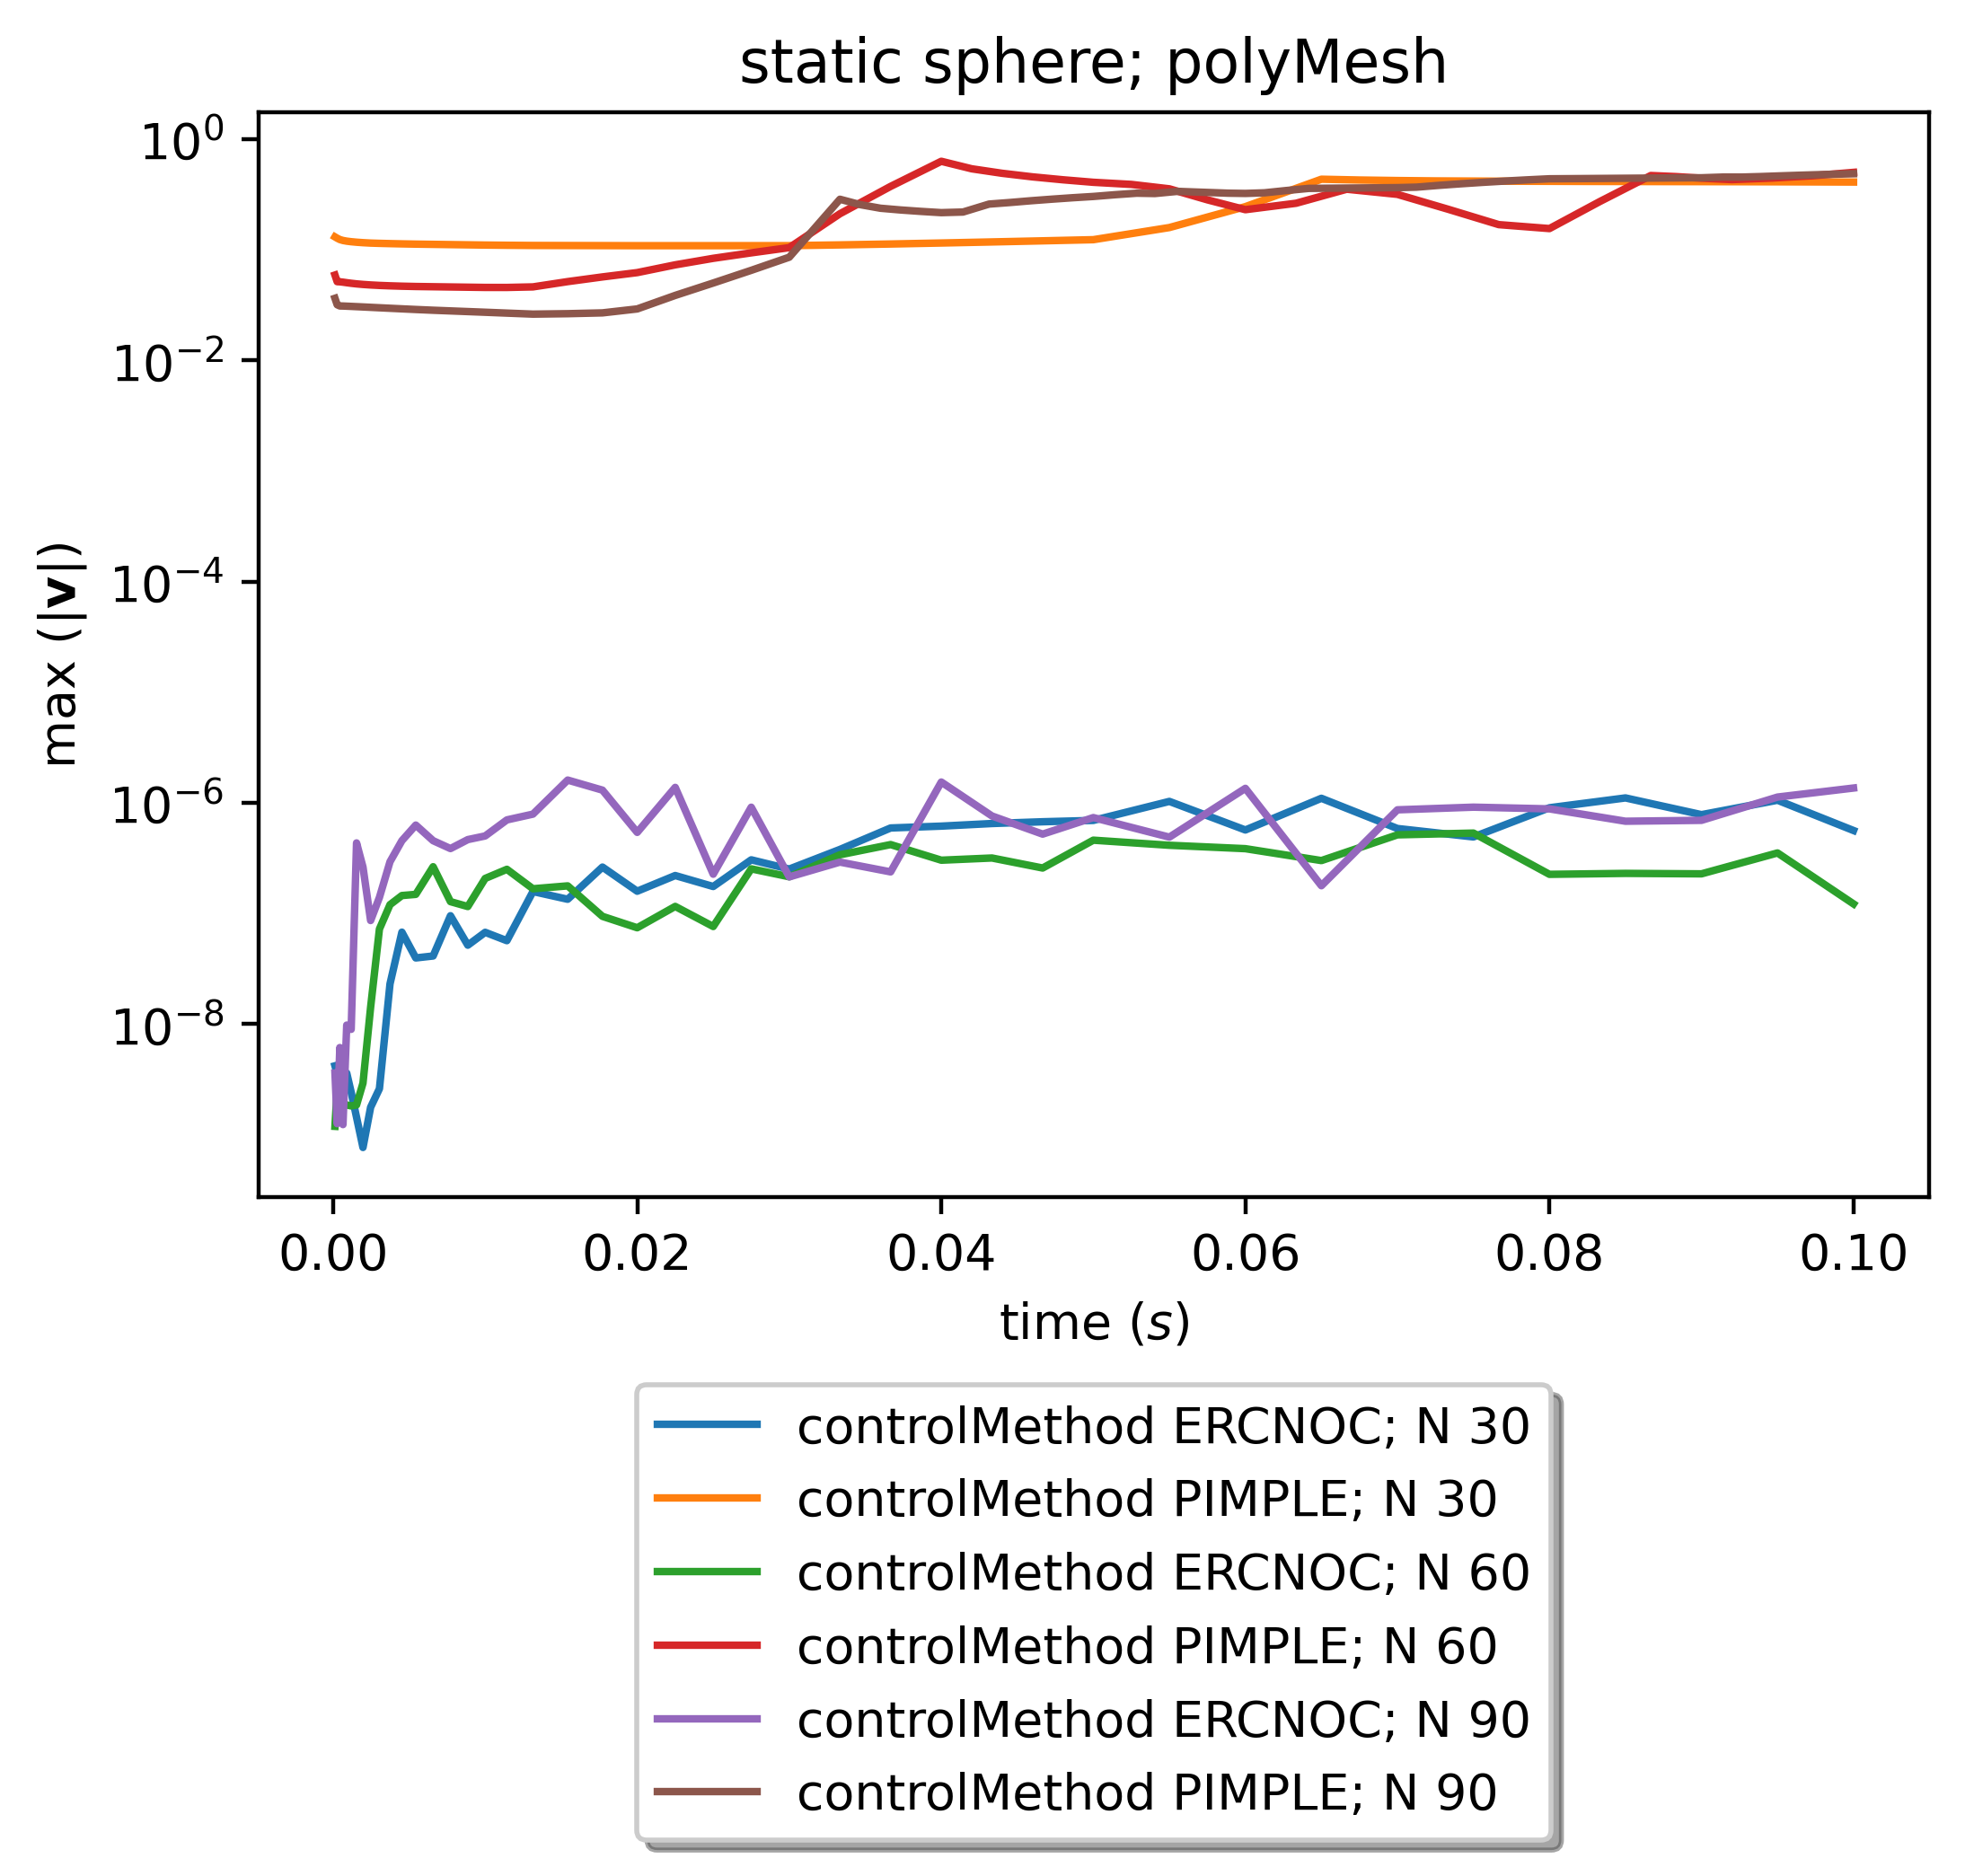

In [79]:
plot_magU(dframe_magU,"polyMesh",0)

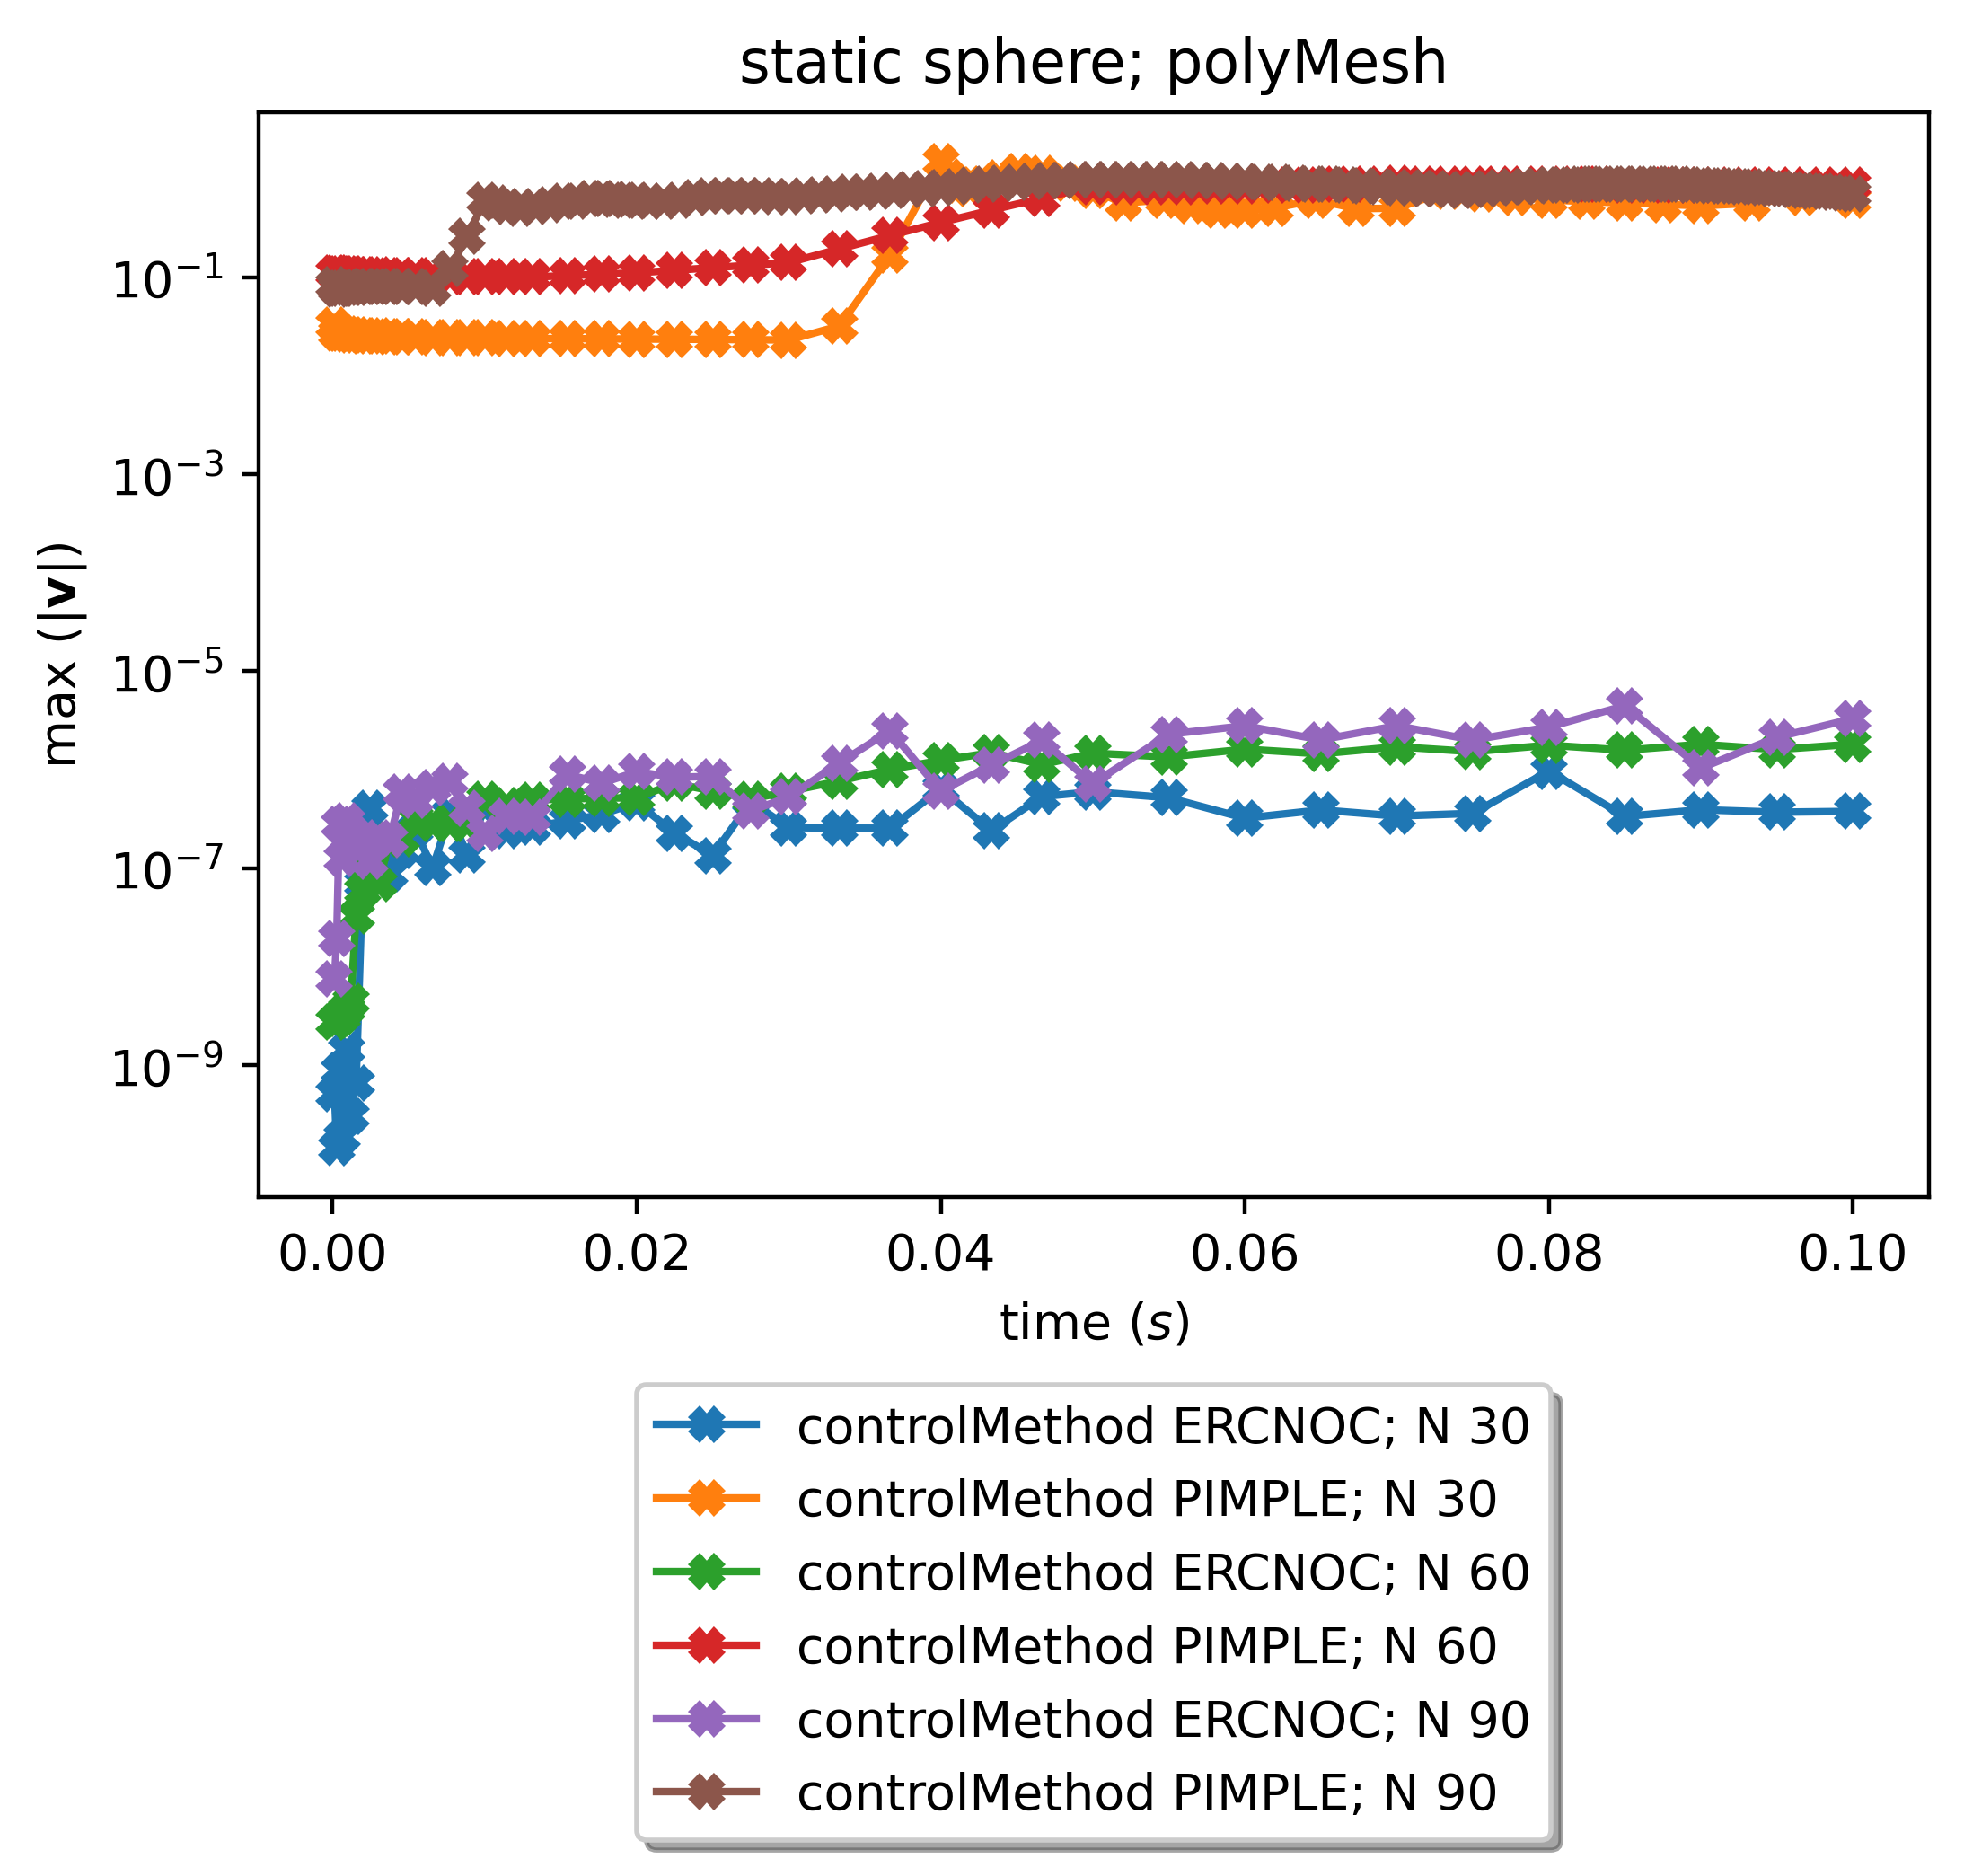

In [82]:
plot_magU(dframe_magU,"polyMesh",15)

In [9]:
def plot_magU_full(dframe, meshType, Nnon):
    resolutions = dframe.index.get_level_values("resolution").unique()
    nonOrthogControls =dframe.index.get_level_values("nonOrthogControl").unique()
    meshs = [meshType]
    #gravityModels = ['gravityReconImprove'] #dframe.index.get_level_values("gravityModel").unique()#[gravityModel] #['gravityRecon', 'gravityReconImprove', 'gravityReconImproveCP'] #
    Nnons = [Nnon]#dframe.index.get_level_values("nNonOrthog").unique()#['gravity', 'gravityDirac', 'gravityRecon']
    #marker_list = list(Line2D.markers.keys()) #['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
    

    for resolution in resolutions:
        for mesh in meshs:
            for nonOrthogControl in nonOrthogControls:
                for N in Nnons:
                    #df = dframe.loc[(model,nonOrthogControl,meshType),:]
                    df = dframe.loc[(N, nonOrthogControl,meshType, resolution),:]
                    plt.plot(df["Time"],df["max(U)"], label="controlMethod %s; N %s" % (nonOrthogControl,resolution))#, marker=marker)

    plt.title("Water Column: %s, Nnon %s" % (meshType, N))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
    plt.xlabel(r"time $(s)$")
    plt.ylabel(r"max $(|\mathbf{v}|)$")
    plt.yscale("log")
    plt.show()

In [2]:
agglomerator = da.data_agglomerator("tiltedBox3D.parameter","postProcessing/fieldMinMax/0/fieldMinMax.dat", 
                                     "./De0-tiltedBox3D_00000_template")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("De0-tiltedBox3D.csv")
dframe_magU_full = agglomerator.study_dataframe()
dframe_magU_full = dframe_magU_full.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0, 1, 4, 9], ['ERCNOC', 'PIMPLE'], ['blockMesh', 'perturbMesh', 'polyMesh'], [30, 60, 90], [0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['nNonOrthog', 'nonOrthogControl', 'meshType', 'resolution', 'yRotateDeg', 'step']


In [8]:
dframe_magU_full

Time  min(U)  \
nNonOrthog nonOrthogControl meshType  resolution step                   
0          ERCNOC           blockMesh 30         0     0.0001     0.0   
                                                 1     0.0002     0.0   
                                                 2     0.0003     0.0   
                                                 3     0.0004     0.0   
                                                 4     0.0005     0.0   
...                                                       ...     ...   
9          PIMPLE           polyMesh  90         129   0.0130     0.0   
                                                 130   0.0131     0.0   
                                                 131   0.0132     0.0   
                                                 132   0.0133     0.0   
                                                 133   0.0134     0.0   

                                                             max(U)  \
nNonOrthog nonOrthogControl meshType  resolution step                 
0          ERCNOC           blockMesh 30         0     3.910892e-12   
                                                 1     7.821774e-12   
                                                 2     1.173264e-11   
                                                 3     1.564351e-11   
                                                 4     1.955436e-11   
...                                                             ...   
9          PIMPLE           polyMesh  90         129   1.817657e-08   
                                                 130   1.119151e-08   
                                                 131   1.782260e-08   
                                                 132   2.524473e-08   
                                                 133   6.352754e-09   

                                                         min(p_rgh)  \
nNonOrthog nonOrthogControl meshType  resolution step                 
0          ERCNOC           blockMesh 30         0    -1.215119e-08   
                                                 1    -1.215119e-08   
                                                 2    -1.215119e-08   
                                                 3    -1.215119e-08   
                                                 4    -1.215119e-08   
...                                                             ...   
9          PIMPLE           polyMesh  90         129  -5.331606e-07   
                                                 130  -3.692344e-07   
                                                 131  -3.692344e-07   
                                                 132  -3.692344e-07   
                                                 133  -5.368005e-07   

                                                        max(p_rgh)  
nNonOrthog nonOrthogControl meshType  resolution step               
0          ERCNOC           blockMesh 30         0     5042.197755  
                                                 1     5042.197755  
                                                 2     5042.197755  
                                                 3     5042.197755  
                                                 4     5042.197755  
...                                                            ...  
9          PIMPLE           polyMesh  90         129   5042.197892  
                                                 130   5042.197820  
                                                 131   5042.197820  
                                                 132   5042.197820  
                                                 133   5042.197906  

[61602 rows x 5 columns]

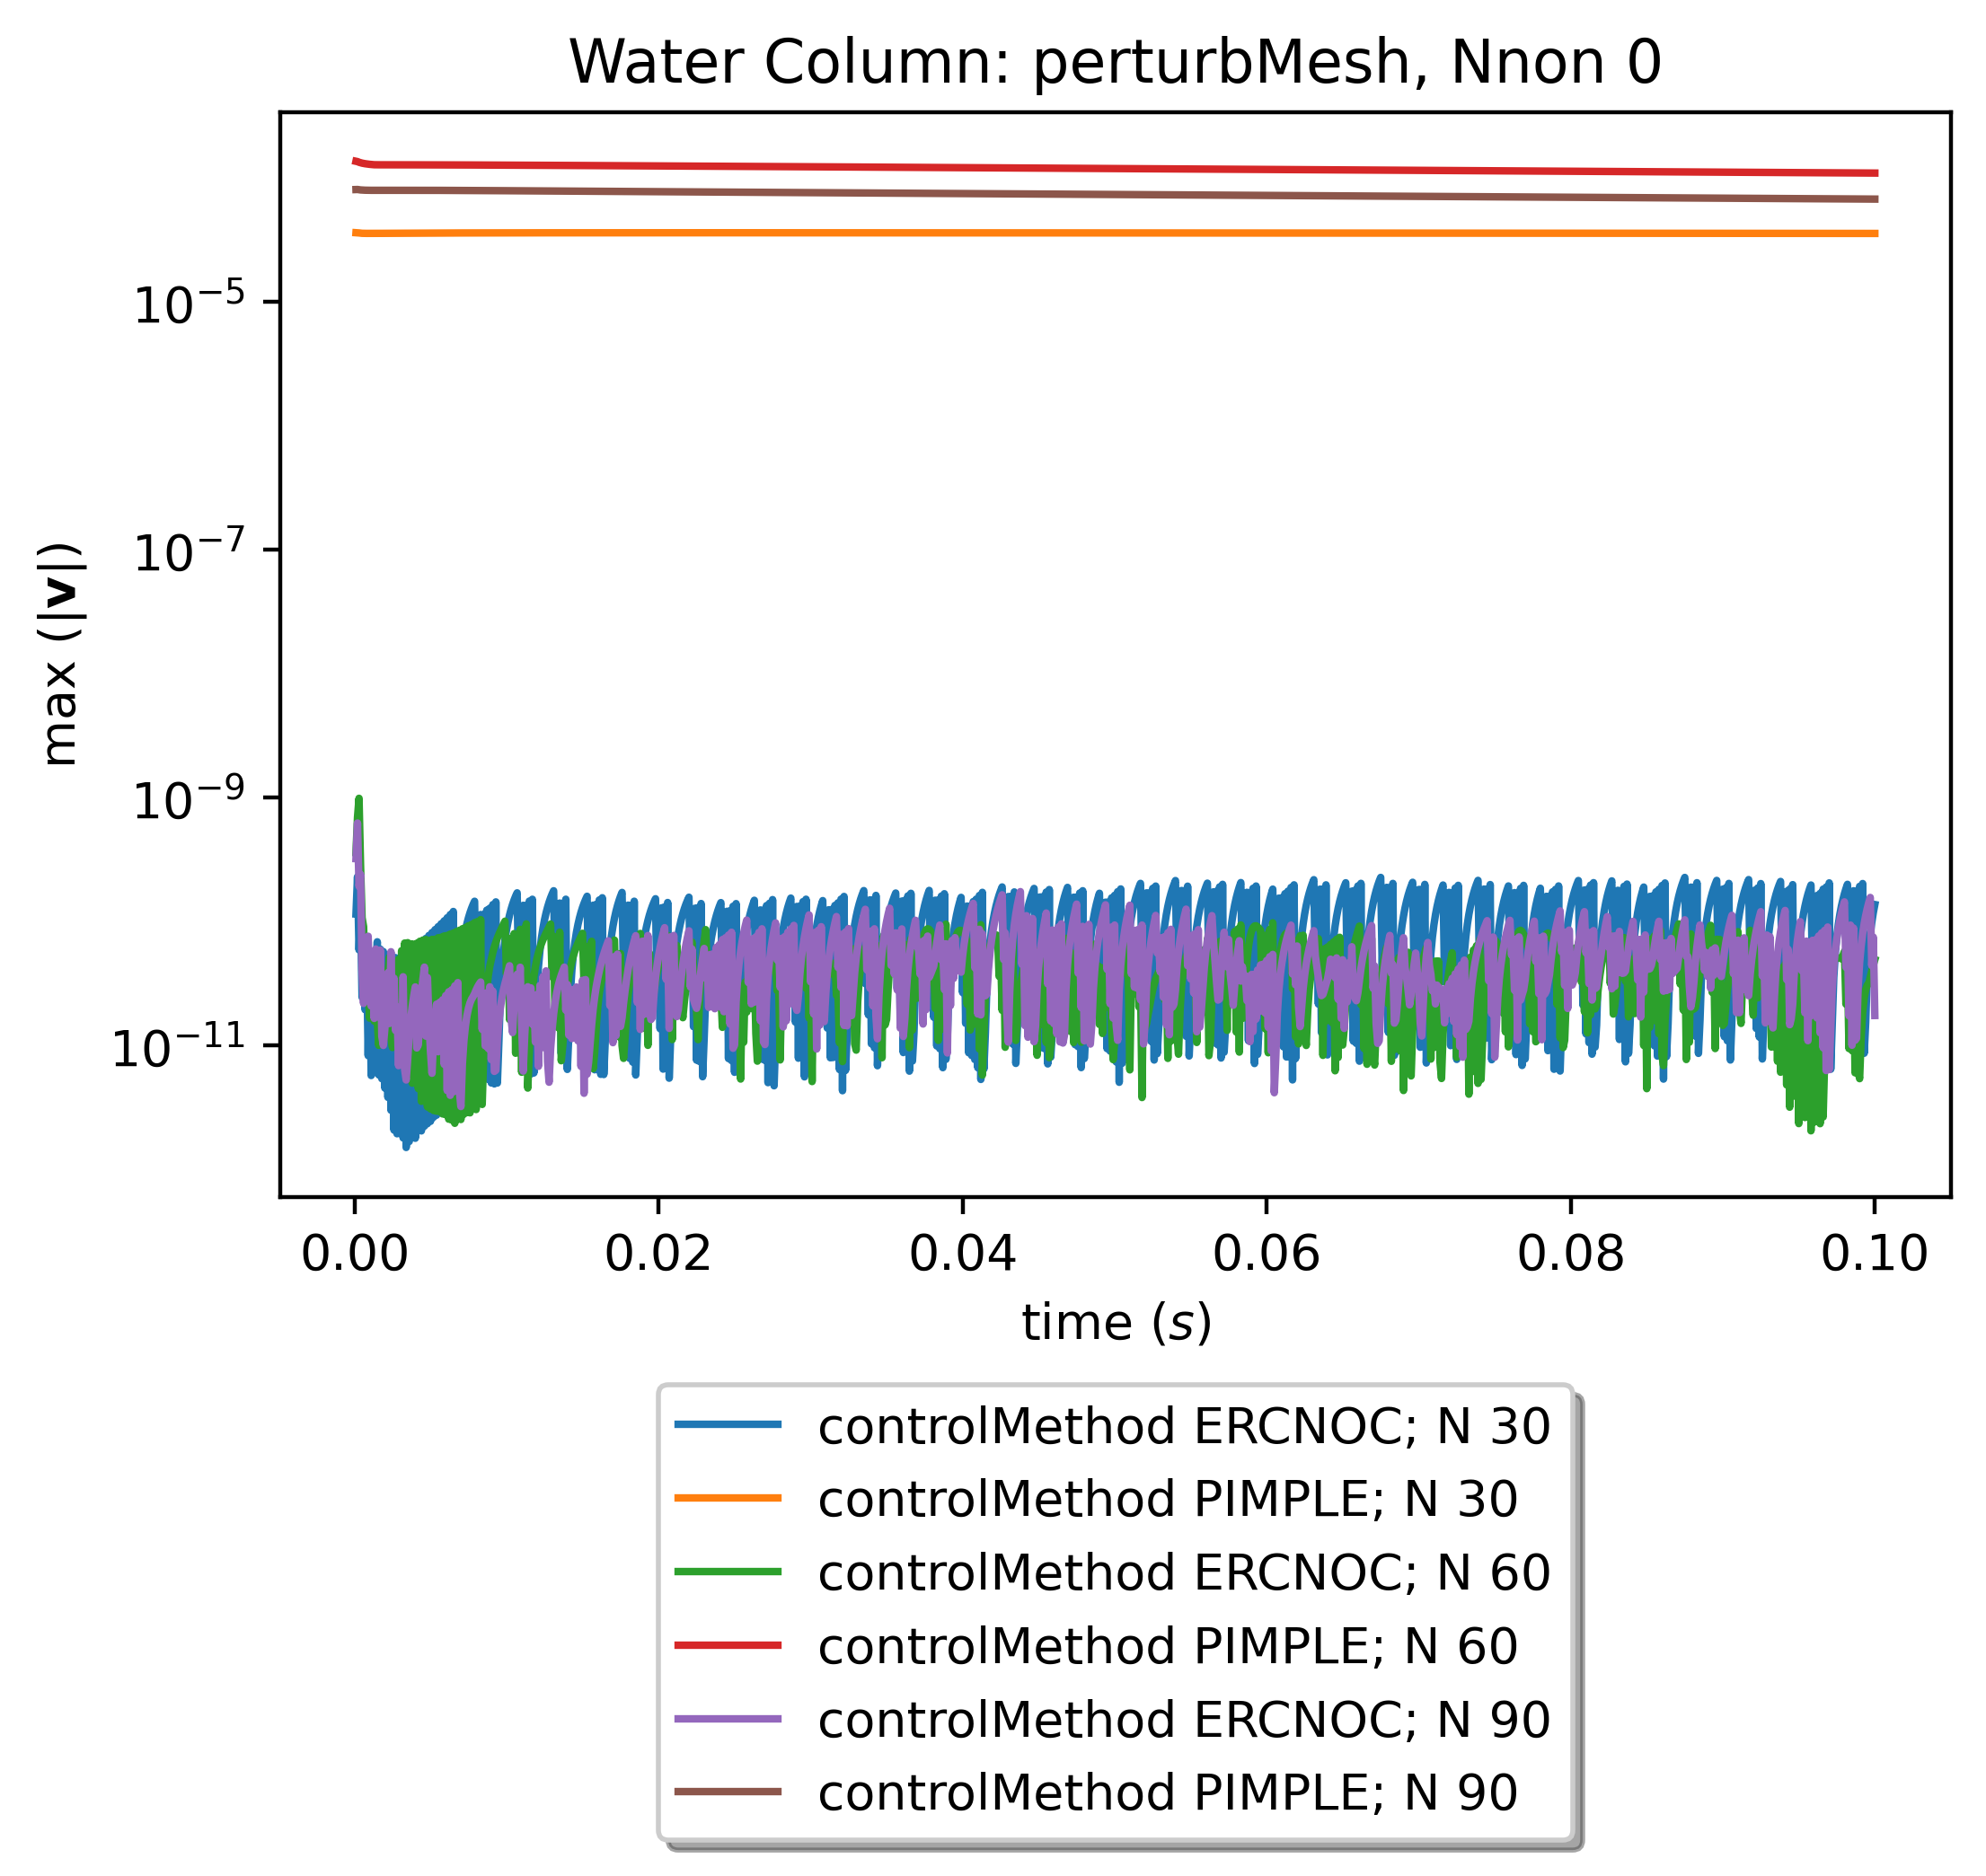

In [6]:
plot_magU_full(dframe_magU_full,"perturbMesh",0)

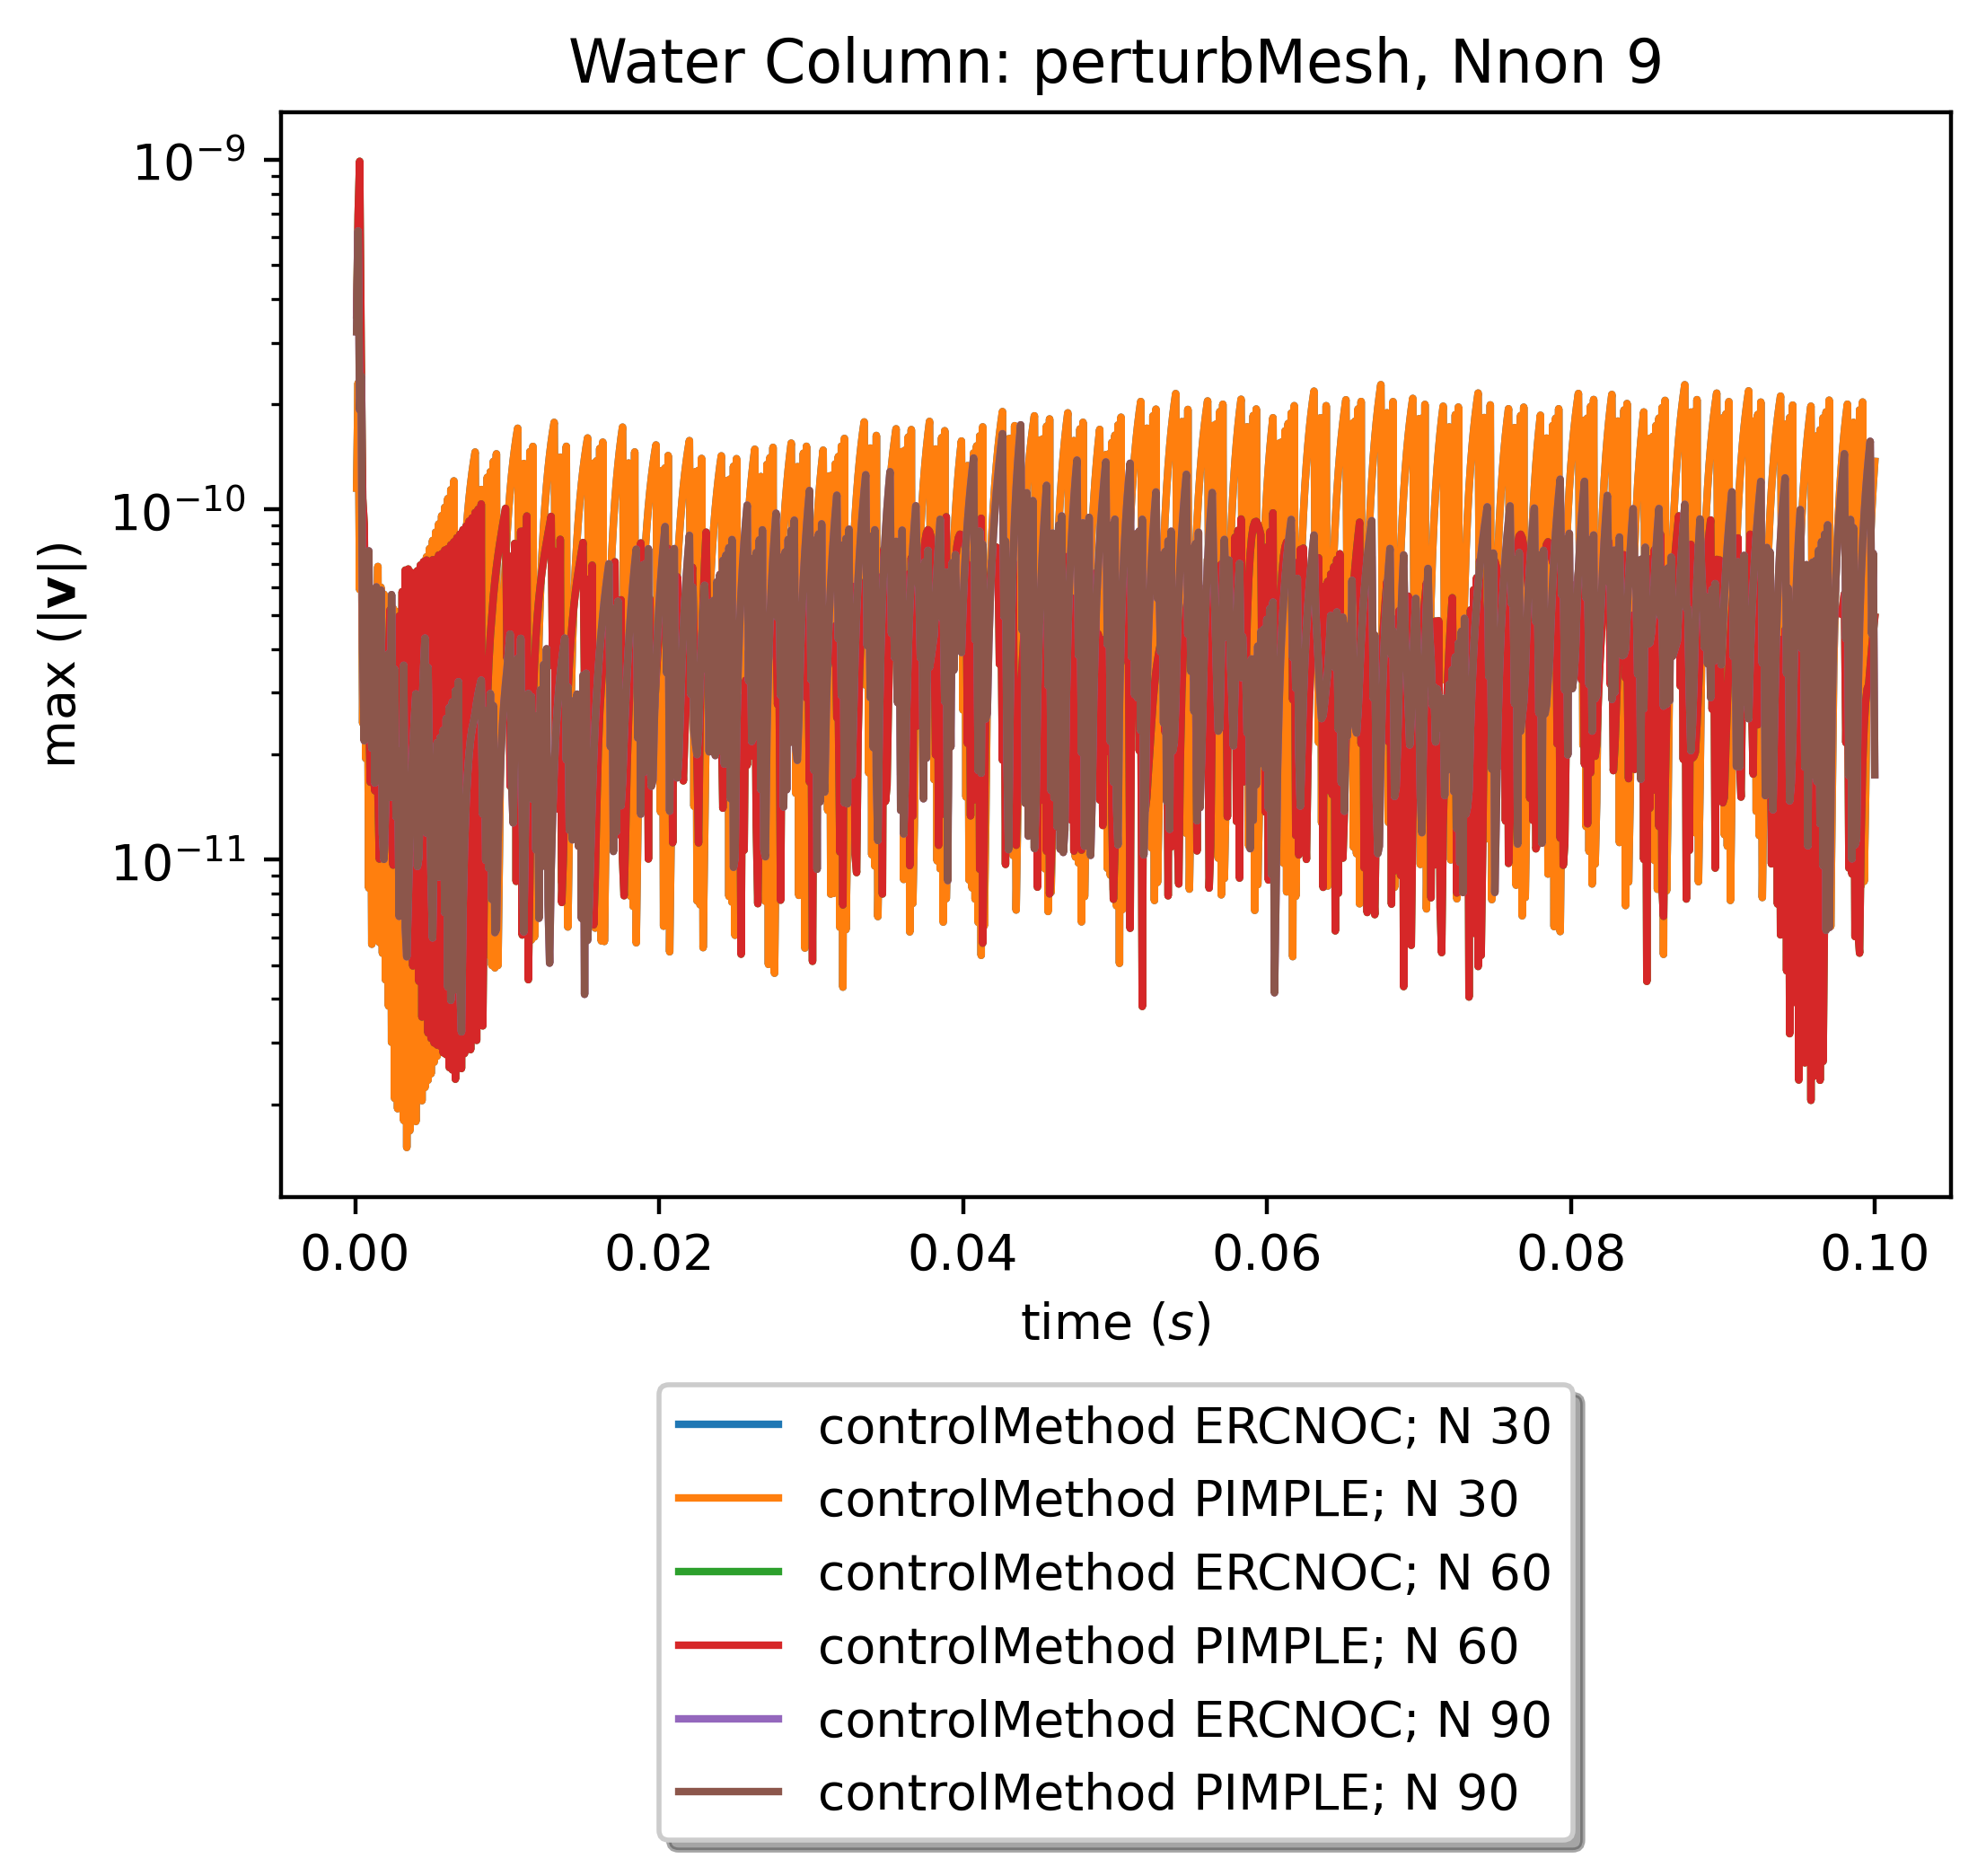

In [17]:
plot_magU_full(dframe_magU_full,"perturbMesh",9)

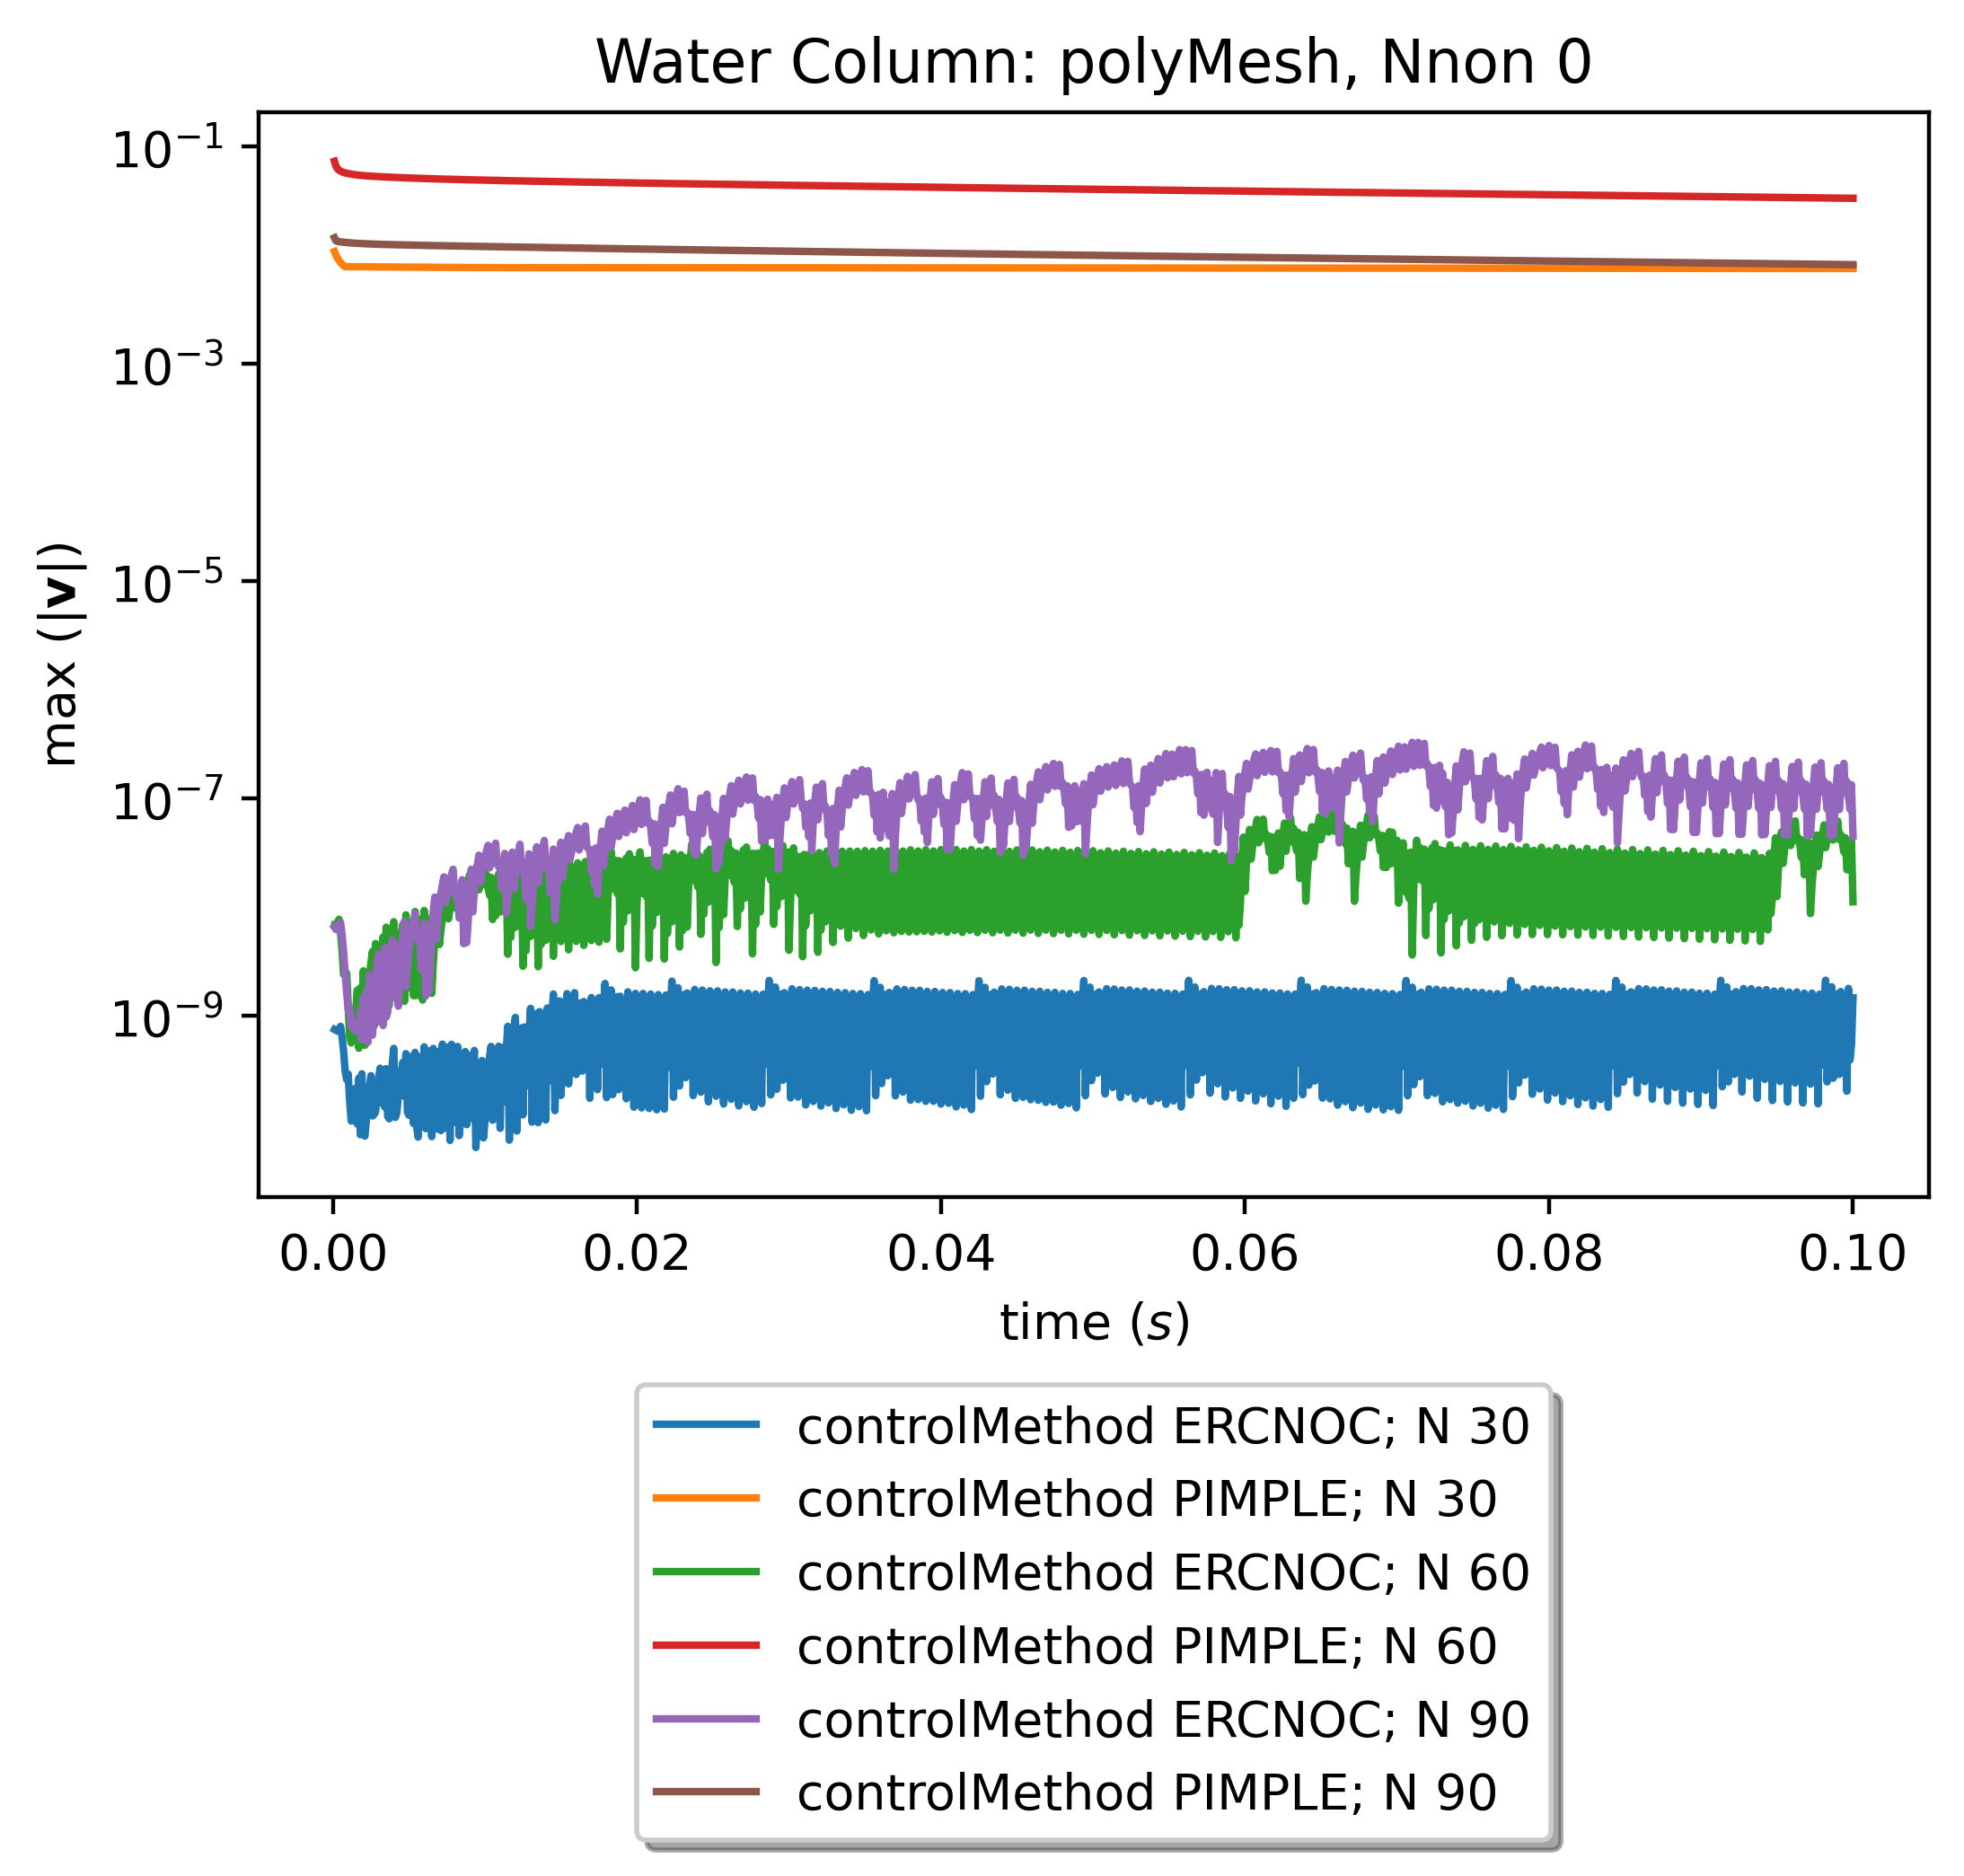

In [18]:
plot_magU_full(dframe_magU_full,"polyMesh",0)

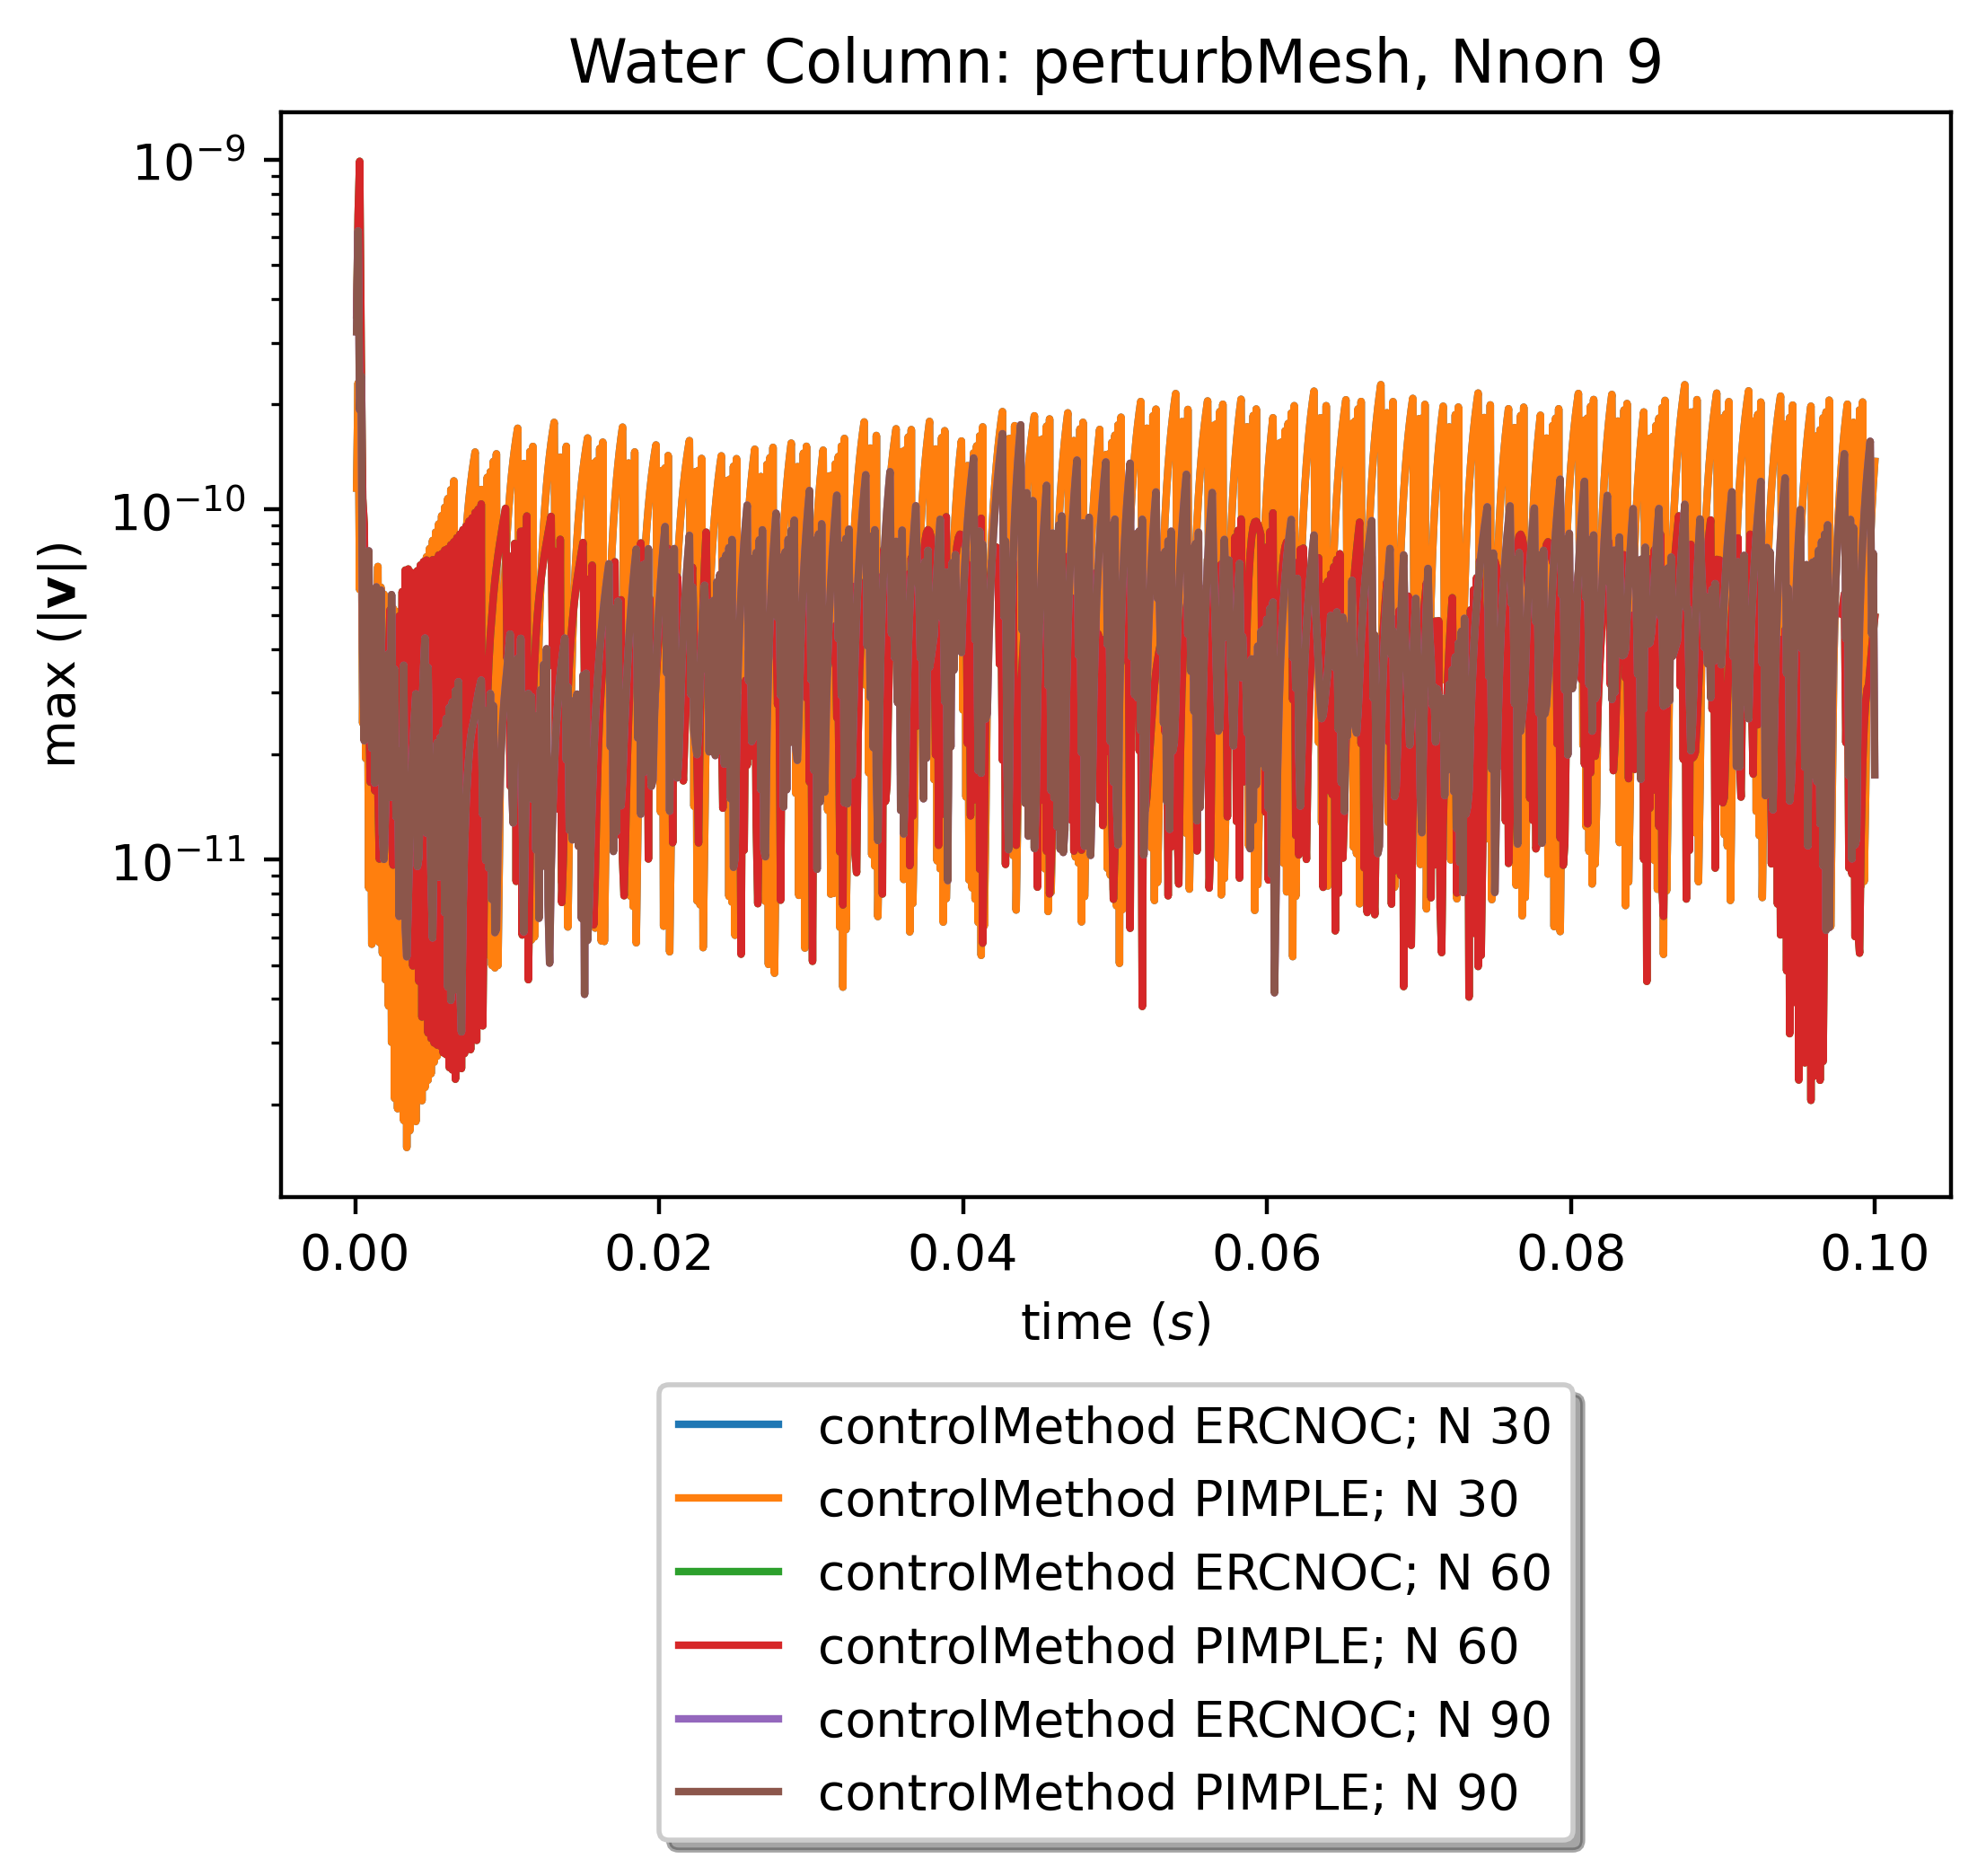

In [33]:
plot_magU_full(dframe_magU_full,"perturbMesh",9)

In [35]:
def print_mag_full(dframe, meshType, Nnon, control):
    resolutions = dframe.index.get_level_values("resolution").unique()
    nonOrthogControls =[control]#dframe.index.get_level_values("nonOrthogControl").unique()
    meshs = [meshType]
    #gravityModels = ['gravityReconImprove'] #dframe.index.get_level_values("gravityModel").unique()#[gravityModel] #['gravityRecon', 'gravityReconImprove', 'gravityReconImproveCP'] #
    Nnons = [Nnon]#dframe.index.get_level_values("nNonOrthog").unique()#['gravity', 'gravityDirac', 'gravityRecon']
    #marker_list = list(Line2D.markers.keys()) #['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
    

    for resolution in resolutions:
        for mesh in meshs:
            for nonOrthogControl in nonOrthogControls:
                for N in Nnons:
                    #df = dframe.loc[(model,nonOrthogControl,meshType),:]
                    df = dframe.loc[(N, nonOrthogControl,meshType, resolution),:]
                    maxU = df["max(U)"].iloc[-1]
                    maxDeltap = (df["max(p_rgh)"].iloc[-1]-df["min(p_rgh)"].iloc[-1]-5042.197755)/5042.197755#5032.15373745)/5032.15373745
                    print("meshType: %s; resolution: %s; constrol: %s; max(U) %s; max(deltap) %s;" % (mesh,resolution,nonOrthogControl,maxU,maxDeltap))

In [39]:
print_mag_full(dframe_magU_full,"perturbMesh",9,"PIMPLE")

meshType: perturbMesh; resolution: 30; constrol: PIMPLE; max(U) 1.37317567617624e-10; max(deltap) 1.9503747560538312e-10;
meshType: perturbMesh; resolution: 60; constrol: PIMPLE; max(U) 4.929100730472879e-11; max(deltap) 1.183202231552248e-10;
meshType: perturbMesh; resolution: 90; constrol: PIMPLE; max(U) 1.7483217379631598e-11; max(deltap) 1.6857010738521726e-09;


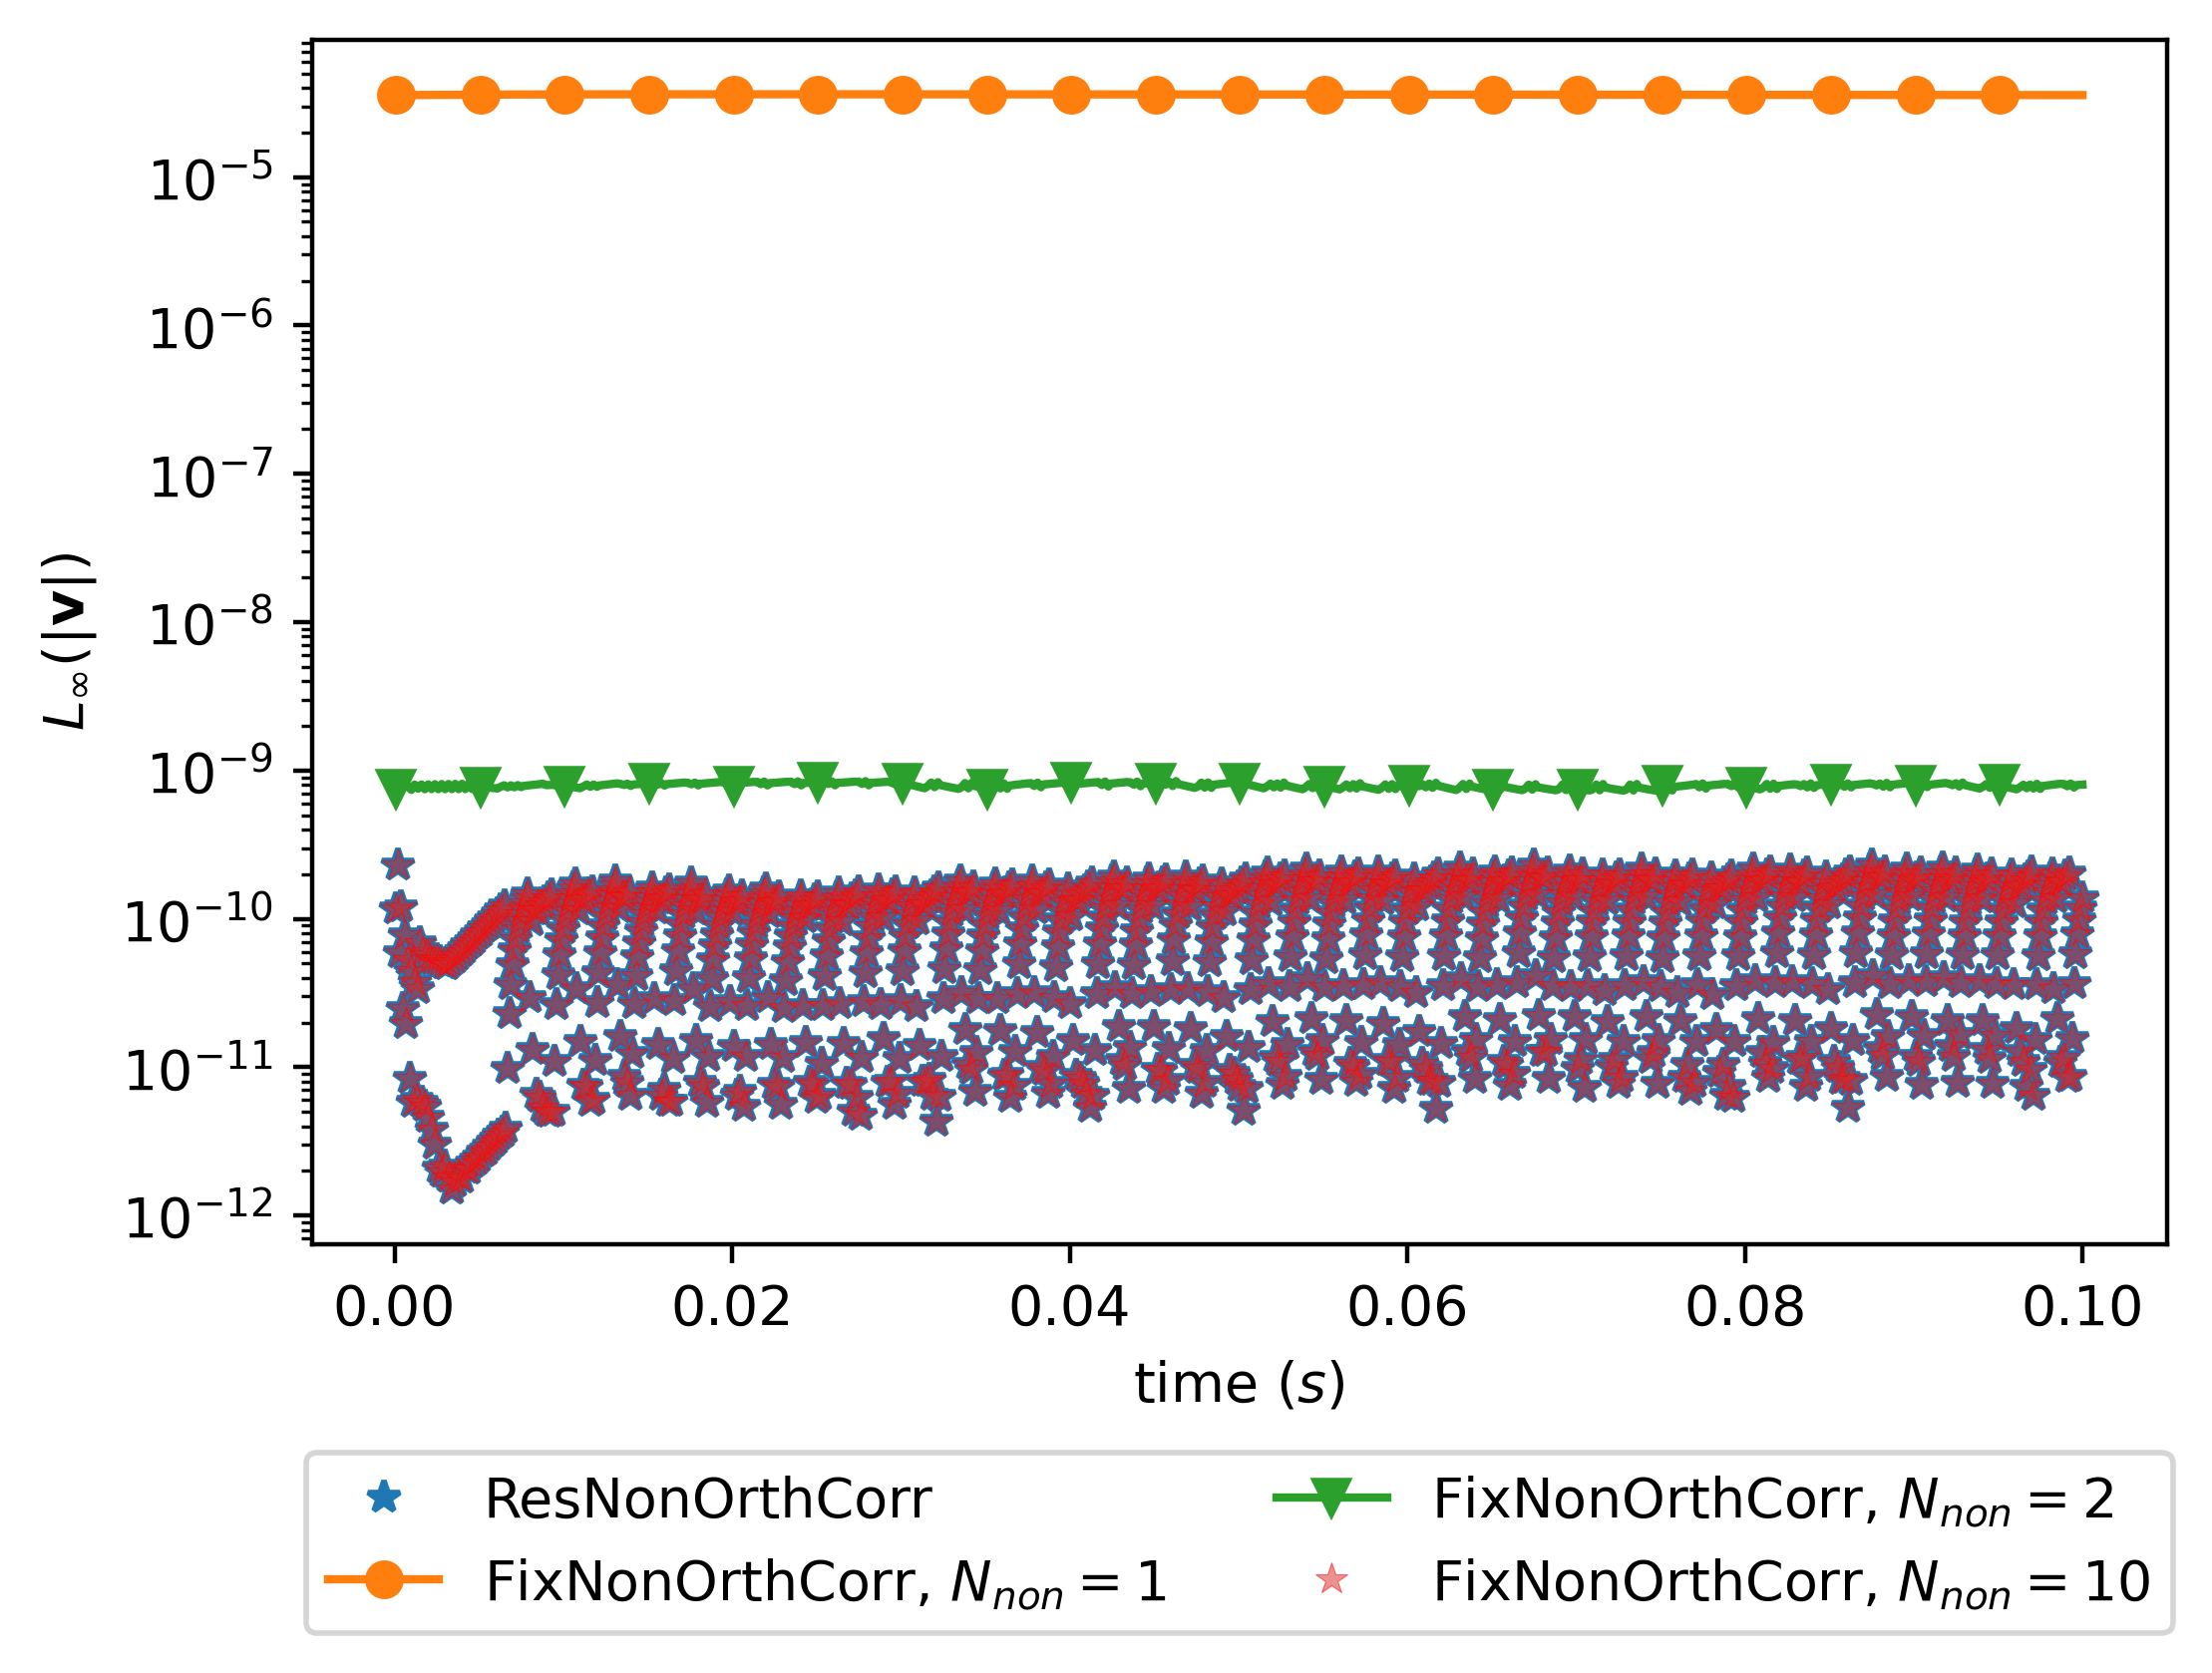

In [3]:
dfN30_ERCNOC = dframe_magU_full.loc[(0,'ERCNOC','perturbMesh',30),:]
dfN30_PIMPLE1 = dframe_magU_full.loc[(0,'PIMPLE','perturbMesh',30),:]
dfN30_PIMPLE2 = dframe_magU_full.loc[(1,'PIMPLE','perturbMesh',30),:]
dfN30_PIMPLE5 = dframe_magU_full.loc[(4,'PIMPLE','perturbMesh',30),:]
dfN30_PIMPLE10 = dframe_magU_full.loc[(9,'PIMPLE','perturbMesh',30),:]
#['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.plot(dfN30_ERCNOC["Time"],dfN30_ERCNOC["max(U)"], marker='*',linestyle='None',label="ResNonOrthCorr") #, marker='+',markevery=50)
plt.plot(dfN30_PIMPLE1["Time"],dfN30_PIMPLE1["max(U)"], label=r"FixNonOrthCorr, $N_{non}=1$", marker='o',markevery=50)
plt.plot(dfN30_PIMPLE2["Time"],dfN30_PIMPLE2["max(U)"], label=r"FixNonOrthCorr, $N_{non}=2$", marker='v',markevery=50)
plt.plot(dfN30_PIMPLE10["Time"],dfN30_PIMPLE10["max(U)"], label=r"FixNonOrthCorr, $N_{non}=10$", marker='*',markevery=1,
         #markerfacecolor="None",
         markeredgecolor='red', 
         markeredgewidth=0.2, 
         linestyle='None',
         alpha=0.5)
#plt.title("static sphere; %s" % (Type))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)#,
      #fancybox=True, shadow=True, ncol=1)
#plt.legend()
plt.yscale("log")
plt.xlabel(r"time $(s)$")
plt.ylabel(r"$L_{\infty}(|\mathbf{v}|)$")
plt.show()

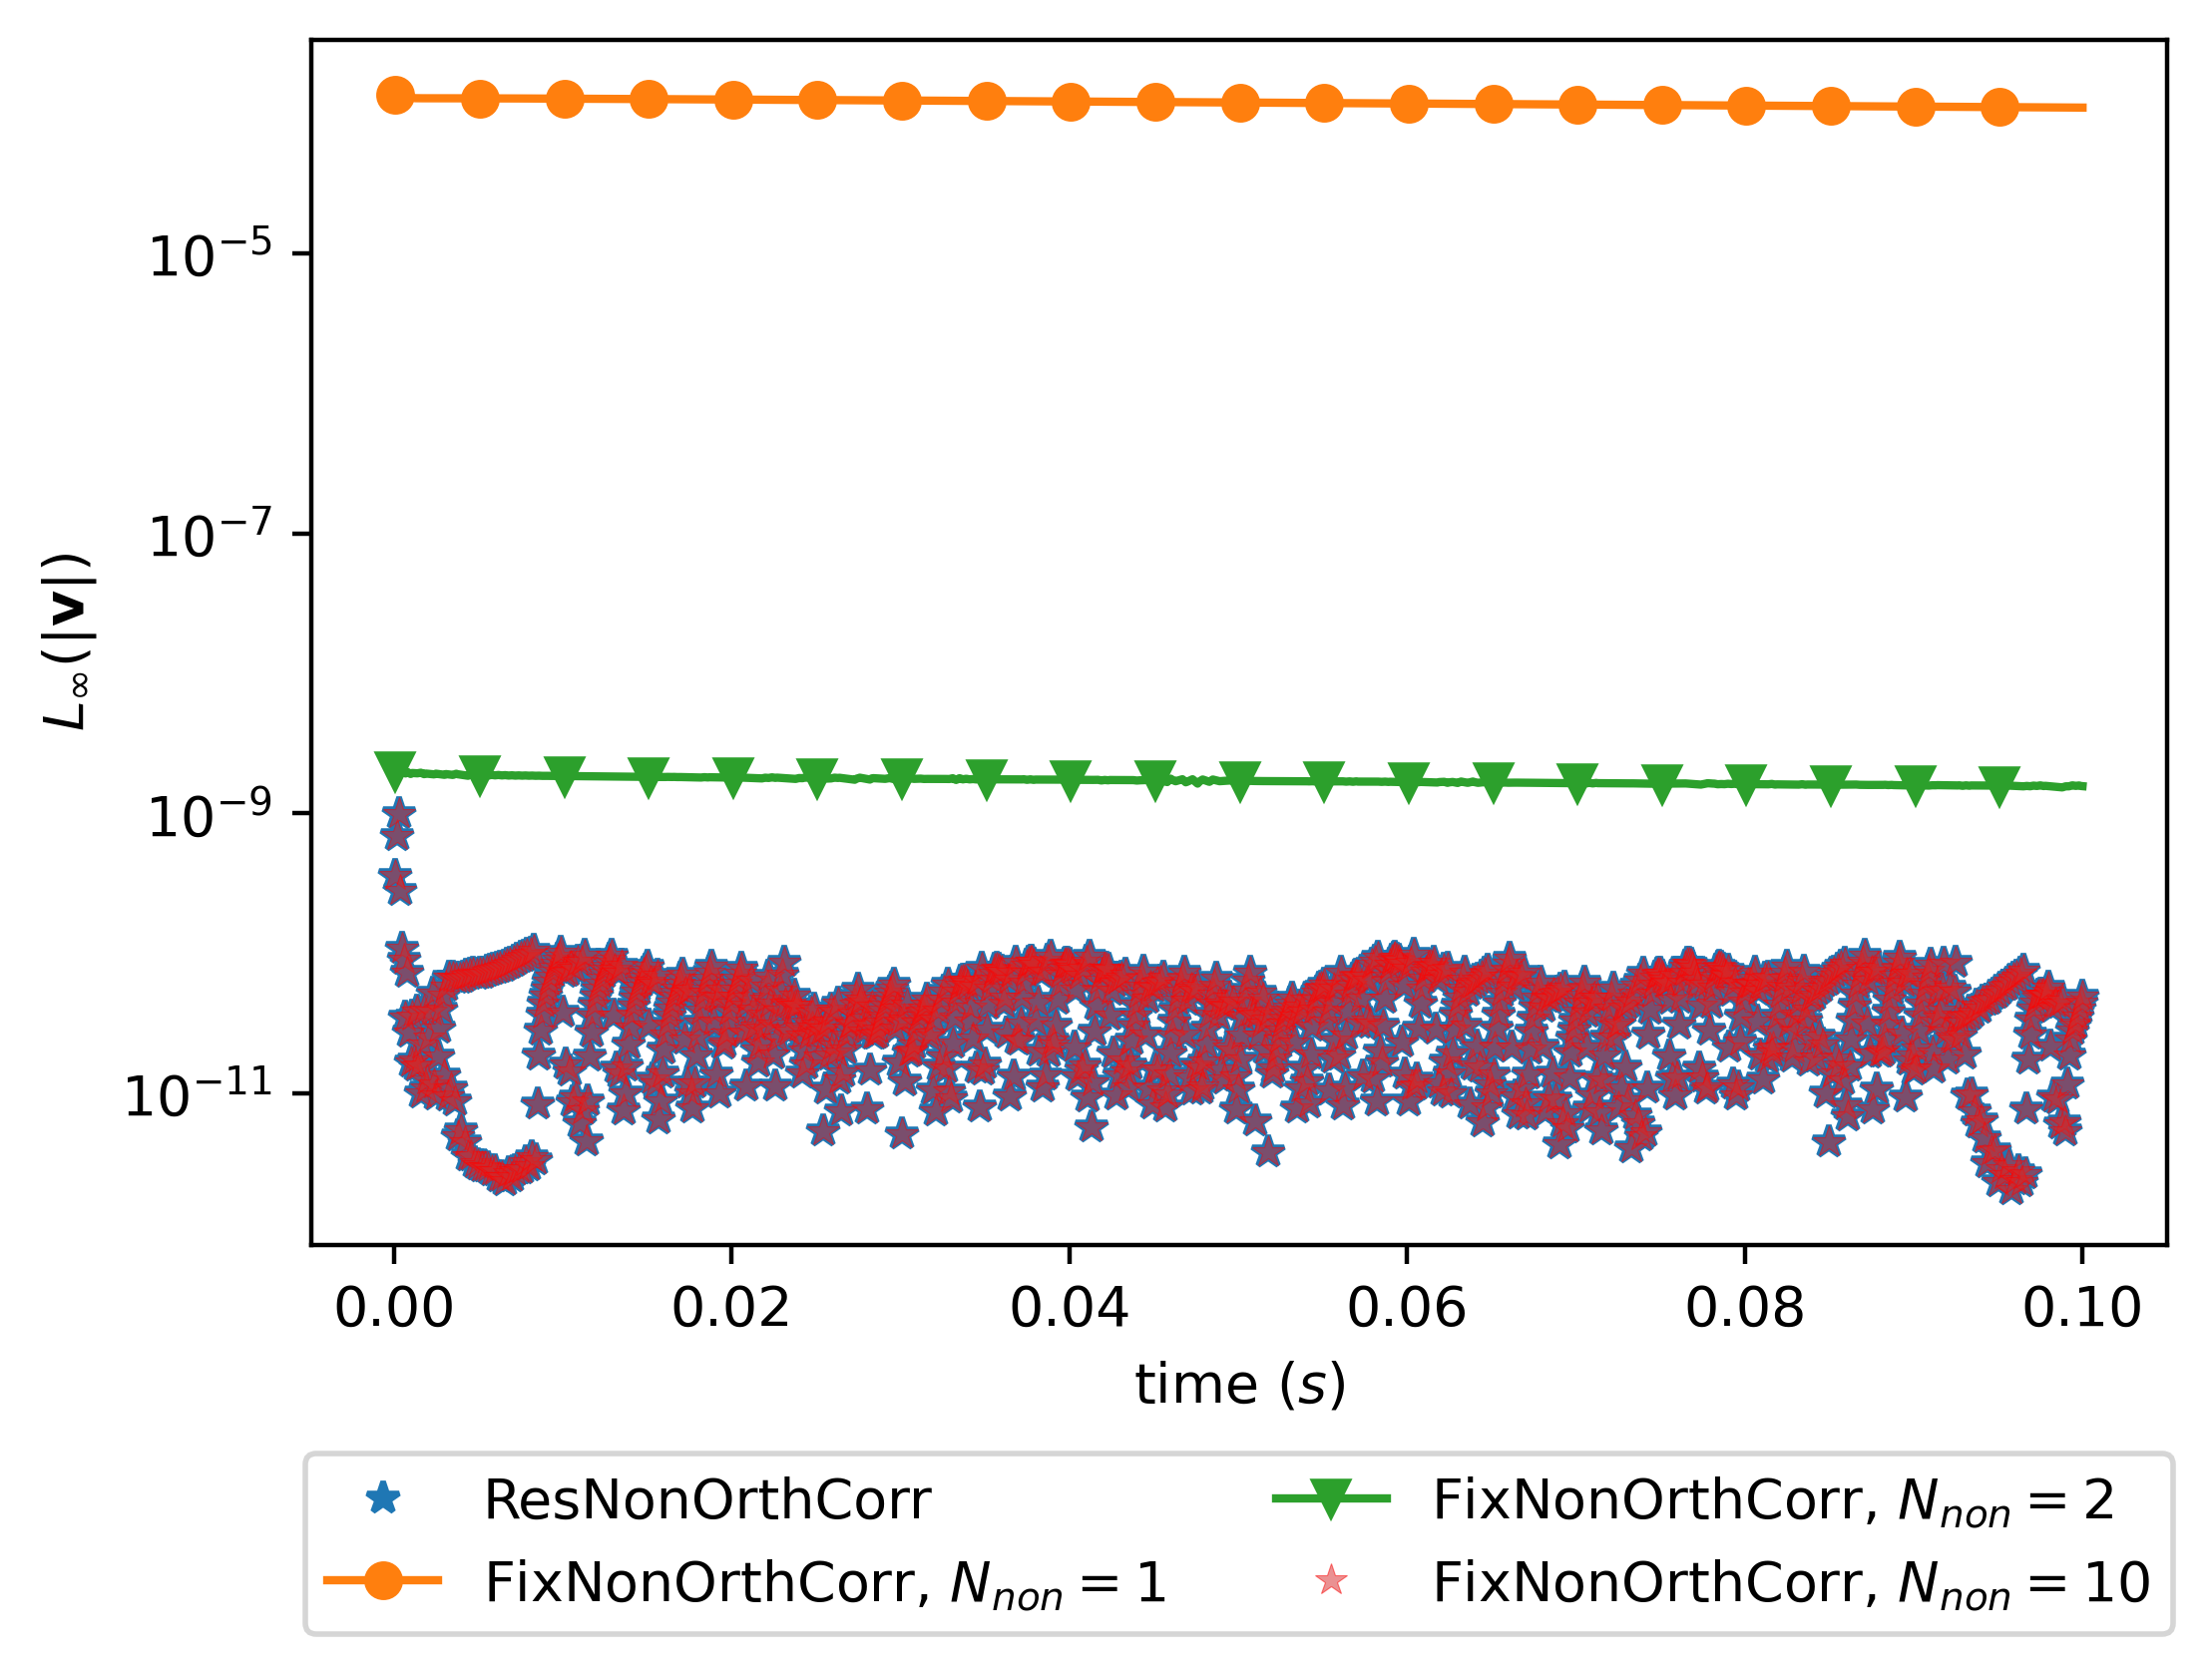

In [4]:
dfN30_ERCNOC = dframe_magU_full.loc[(0,'ERCNOC','perturbMesh',60),:]
dfN30_PIMPLE1 = dframe_magU_full.loc[(0,'PIMPLE','perturbMesh',60),:]
dfN30_PIMPLE2 = dframe_magU_full.loc[(1,'PIMPLE','perturbMesh',60),:]
dfN30_PIMPLE5 = dframe_magU_full.loc[(4,'PIMPLE','perturbMesh',60),:]
dfN30_PIMPLE10 = dframe_magU_full.loc[(9,'PIMPLE','perturbMesh',60),:]
#['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.plot(dfN30_ERCNOC["Time"],dfN30_ERCNOC["max(U)"], marker='*',linestyle='None',label="ResNonOrthCorr") #, marker='+',markevery=50)
plt.plot(dfN30_PIMPLE1["Time"],dfN30_PIMPLE1["max(U)"], label=r"FixNonOrthCorr, $N_{non}=1$", marker='o',markevery=50)
plt.plot(dfN30_PIMPLE2["Time"],dfN30_PIMPLE2["max(U)"], label=r"FixNonOrthCorr, $N_{non}=2$", marker='v',markevery=50)
plt.plot(dfN30_PIMPLE10["Time"],dfN30_PIMPLE10["max(U)"], label=r"FixNonOrthCorr, $N_{non}=10$", marker='*',markevery=1,
         #markerfacecolor="None",
         markeredgecolor='red', 
         markeredgewidth=0.2, 
         linestyle='None',
         alpha=0.5)

#plt.title("static sphere; %s" % (Type))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)#,
      #fancybox=True, shadow=True, ncol=1)
#plt.legend()
plt.yscale("log")
plt.xlabel(r"time $(s)$")
plt.ylabel(r"$L_{\infty}(|\mathbf{v}|)$")
plt.show()

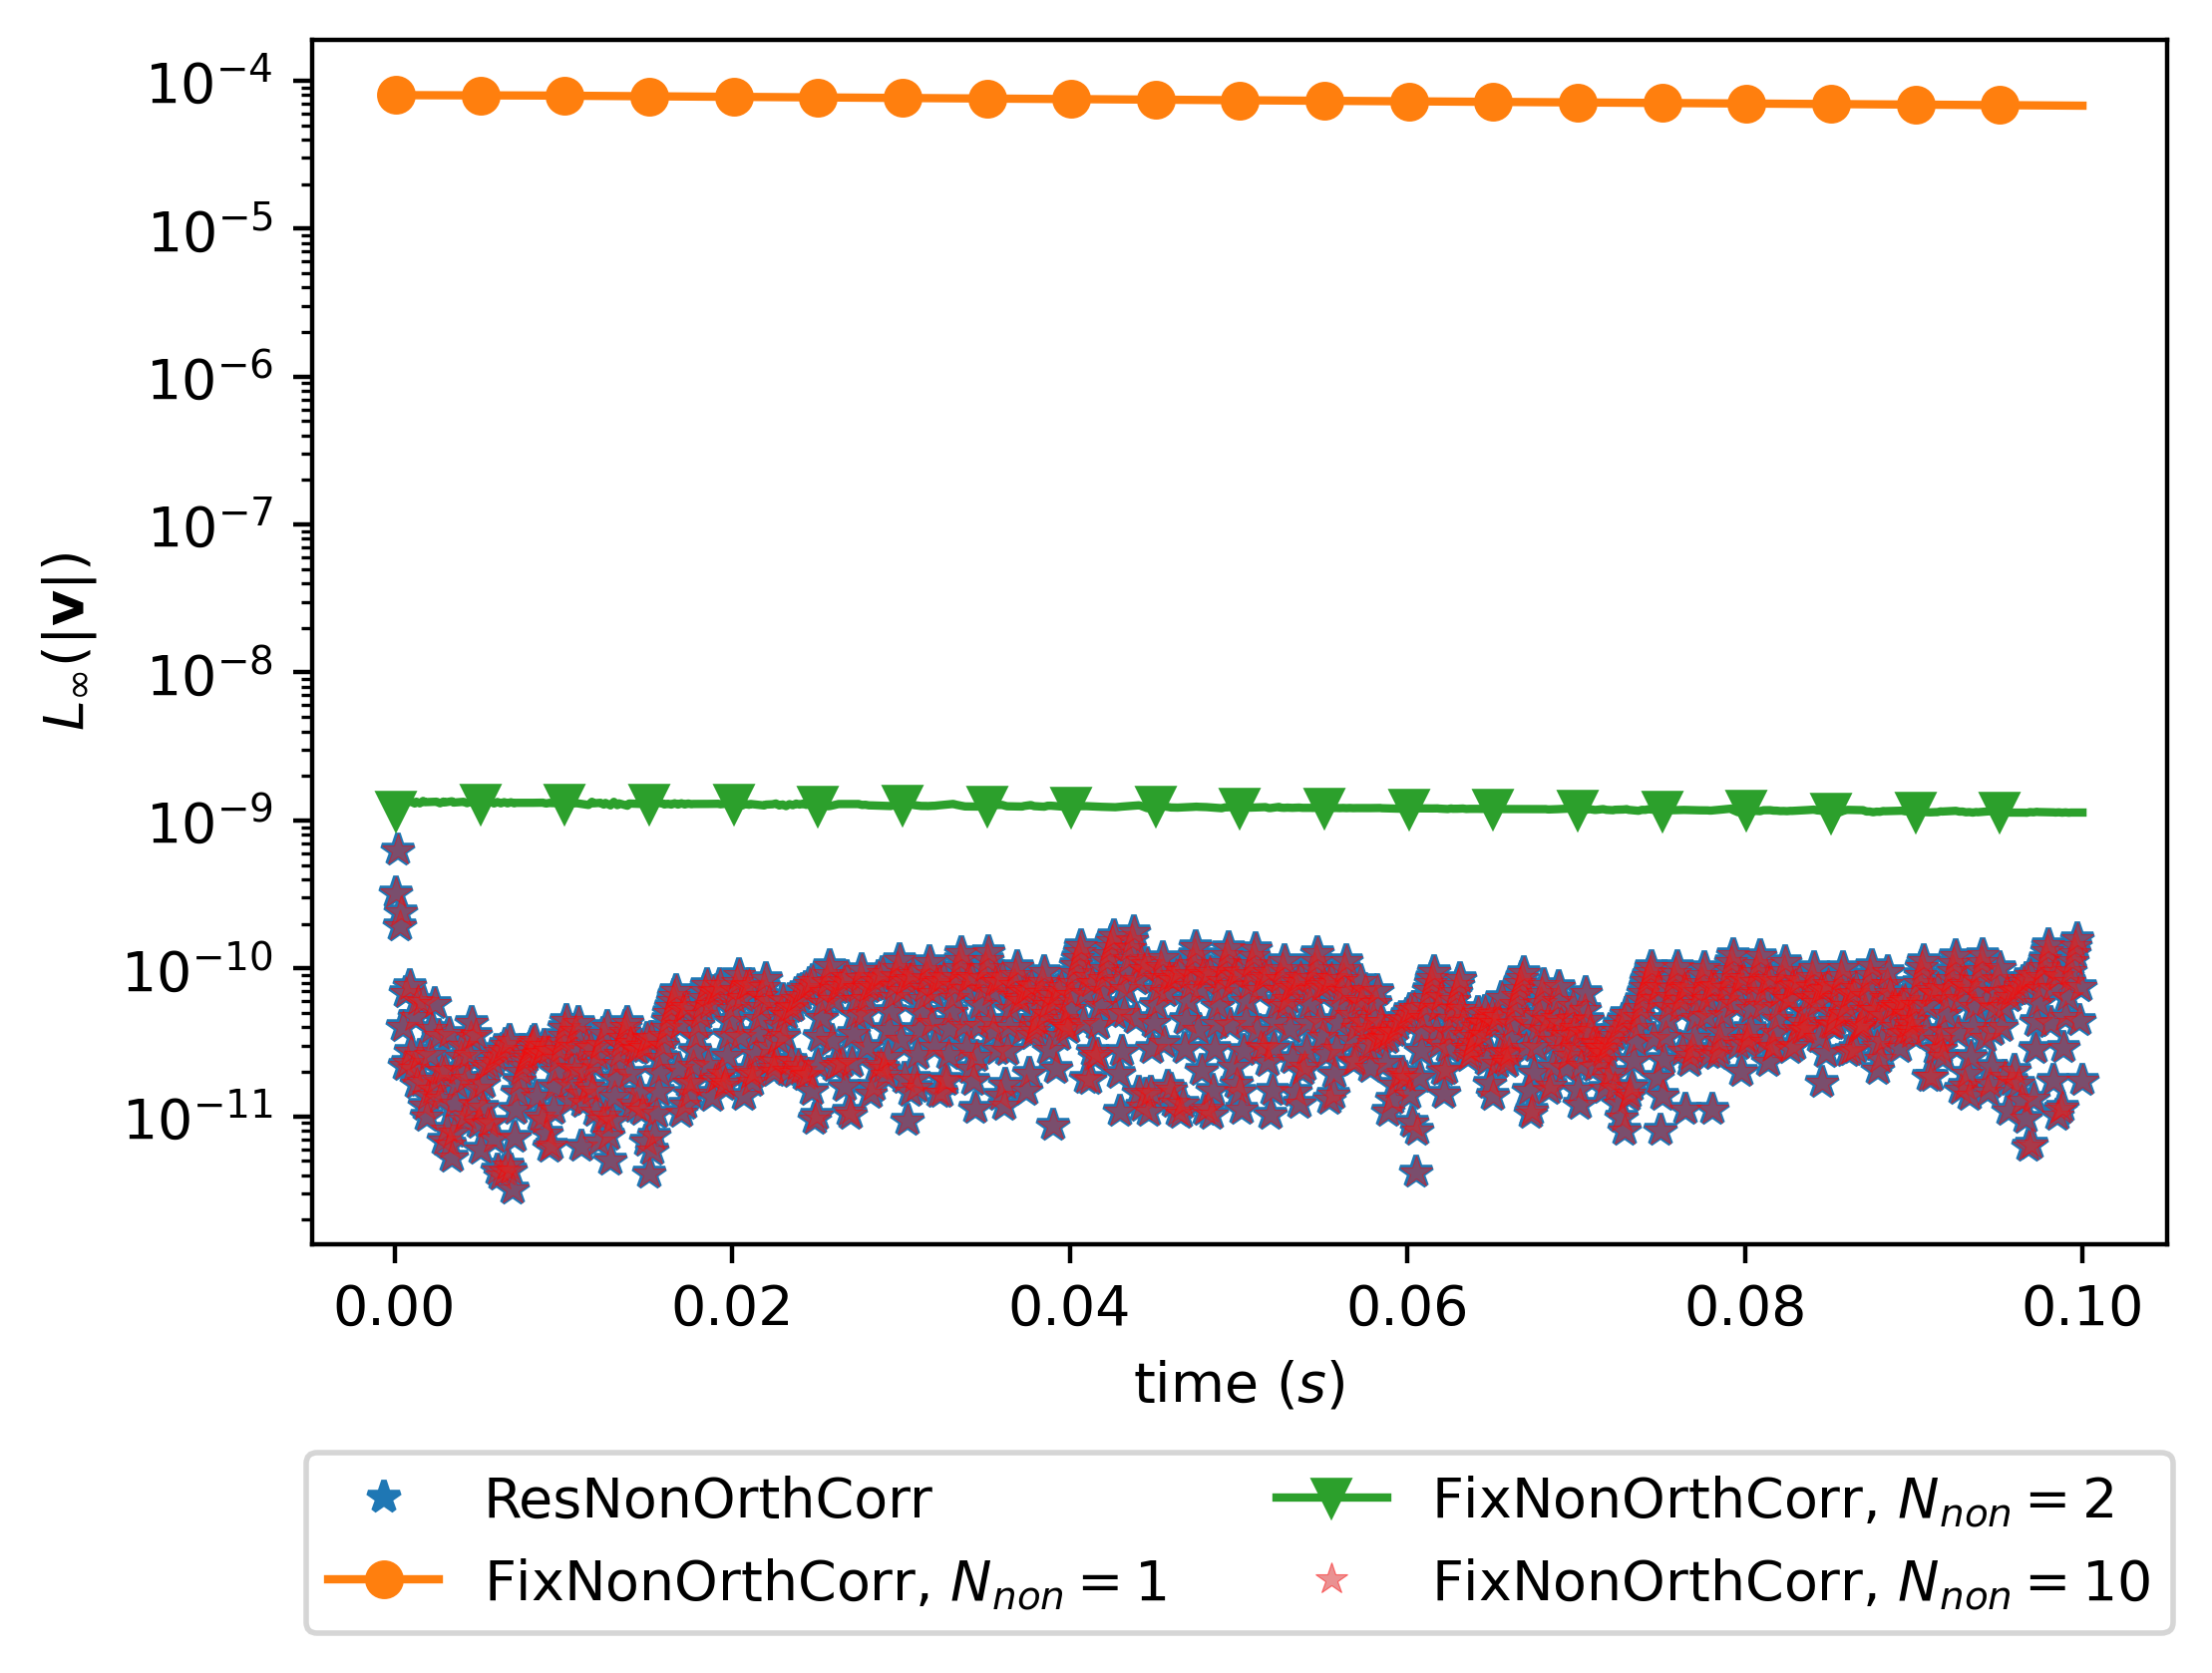

In [5]:
dfN30_ERCNOC = dframe_magU_full.loc[(0,'ERCNOC','perturbMesh',90),:]
dfN30_PIMPLE1 = dframe_magU_full.loc[(0,'PIMPLE','perturbMesh',90),:]
dfN30_PIMPLE2 = dframe_magU_full.loc[(1,'PIMPLE','perturbMesh',90),:]
dfN30_PIMPLE5 = dframe_magU_full.loc[(4,'PIMPLE','perturbMesh',90),:]
dfN30_PIMPLE10 = dframe_magU_full.loc[(9,'PIMPLE','perturbMesh',90),:]
#['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.plot(dfN30_ERCNOC["Time"],dfN30_ERCNOC["max(U)"], marker='*',linestyle='None',label="ResNonOrthCorr") #, marker='+',markevery=50)
plt.plot(dfN30_PIMPLE1["Time"],dfN30_PIMPLE1["max(U)"], label=r"FixNonOrthCorr, $N_{non}=1$", marker='o',markevery=50)
plt.plot(dfN30_PIMPLE2["Time"],dfN30_PIMPLE2["max(U)"], label=r"FixNonOrthCorr, $N_{non}=2$", marker='v',markevery=50)
plt.plot(dfN30_PIMPLE10["Time"],dfN30_PIMPLE10["max(U)"], label=r"FixNonOrthCorr, $N_{non}=10$", marker='*',markevery=1,
         #markerfacecolor="None",
         markeredgecolor='red', 
         markeredgewidth=0.2, 
         linestyle='None',
         alpha=0.5)
#plt.title("static sphere; %s" % (Type))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)#,
      #fancybox=True, shadow=True, ncol=1)
#plt.legend()
plt.yscale("log")
plt.xlabel(r"time $(s)$")
plt.ylabel(r"$L_{\infty}(|\mathbf{v}|)$")
plt.show()

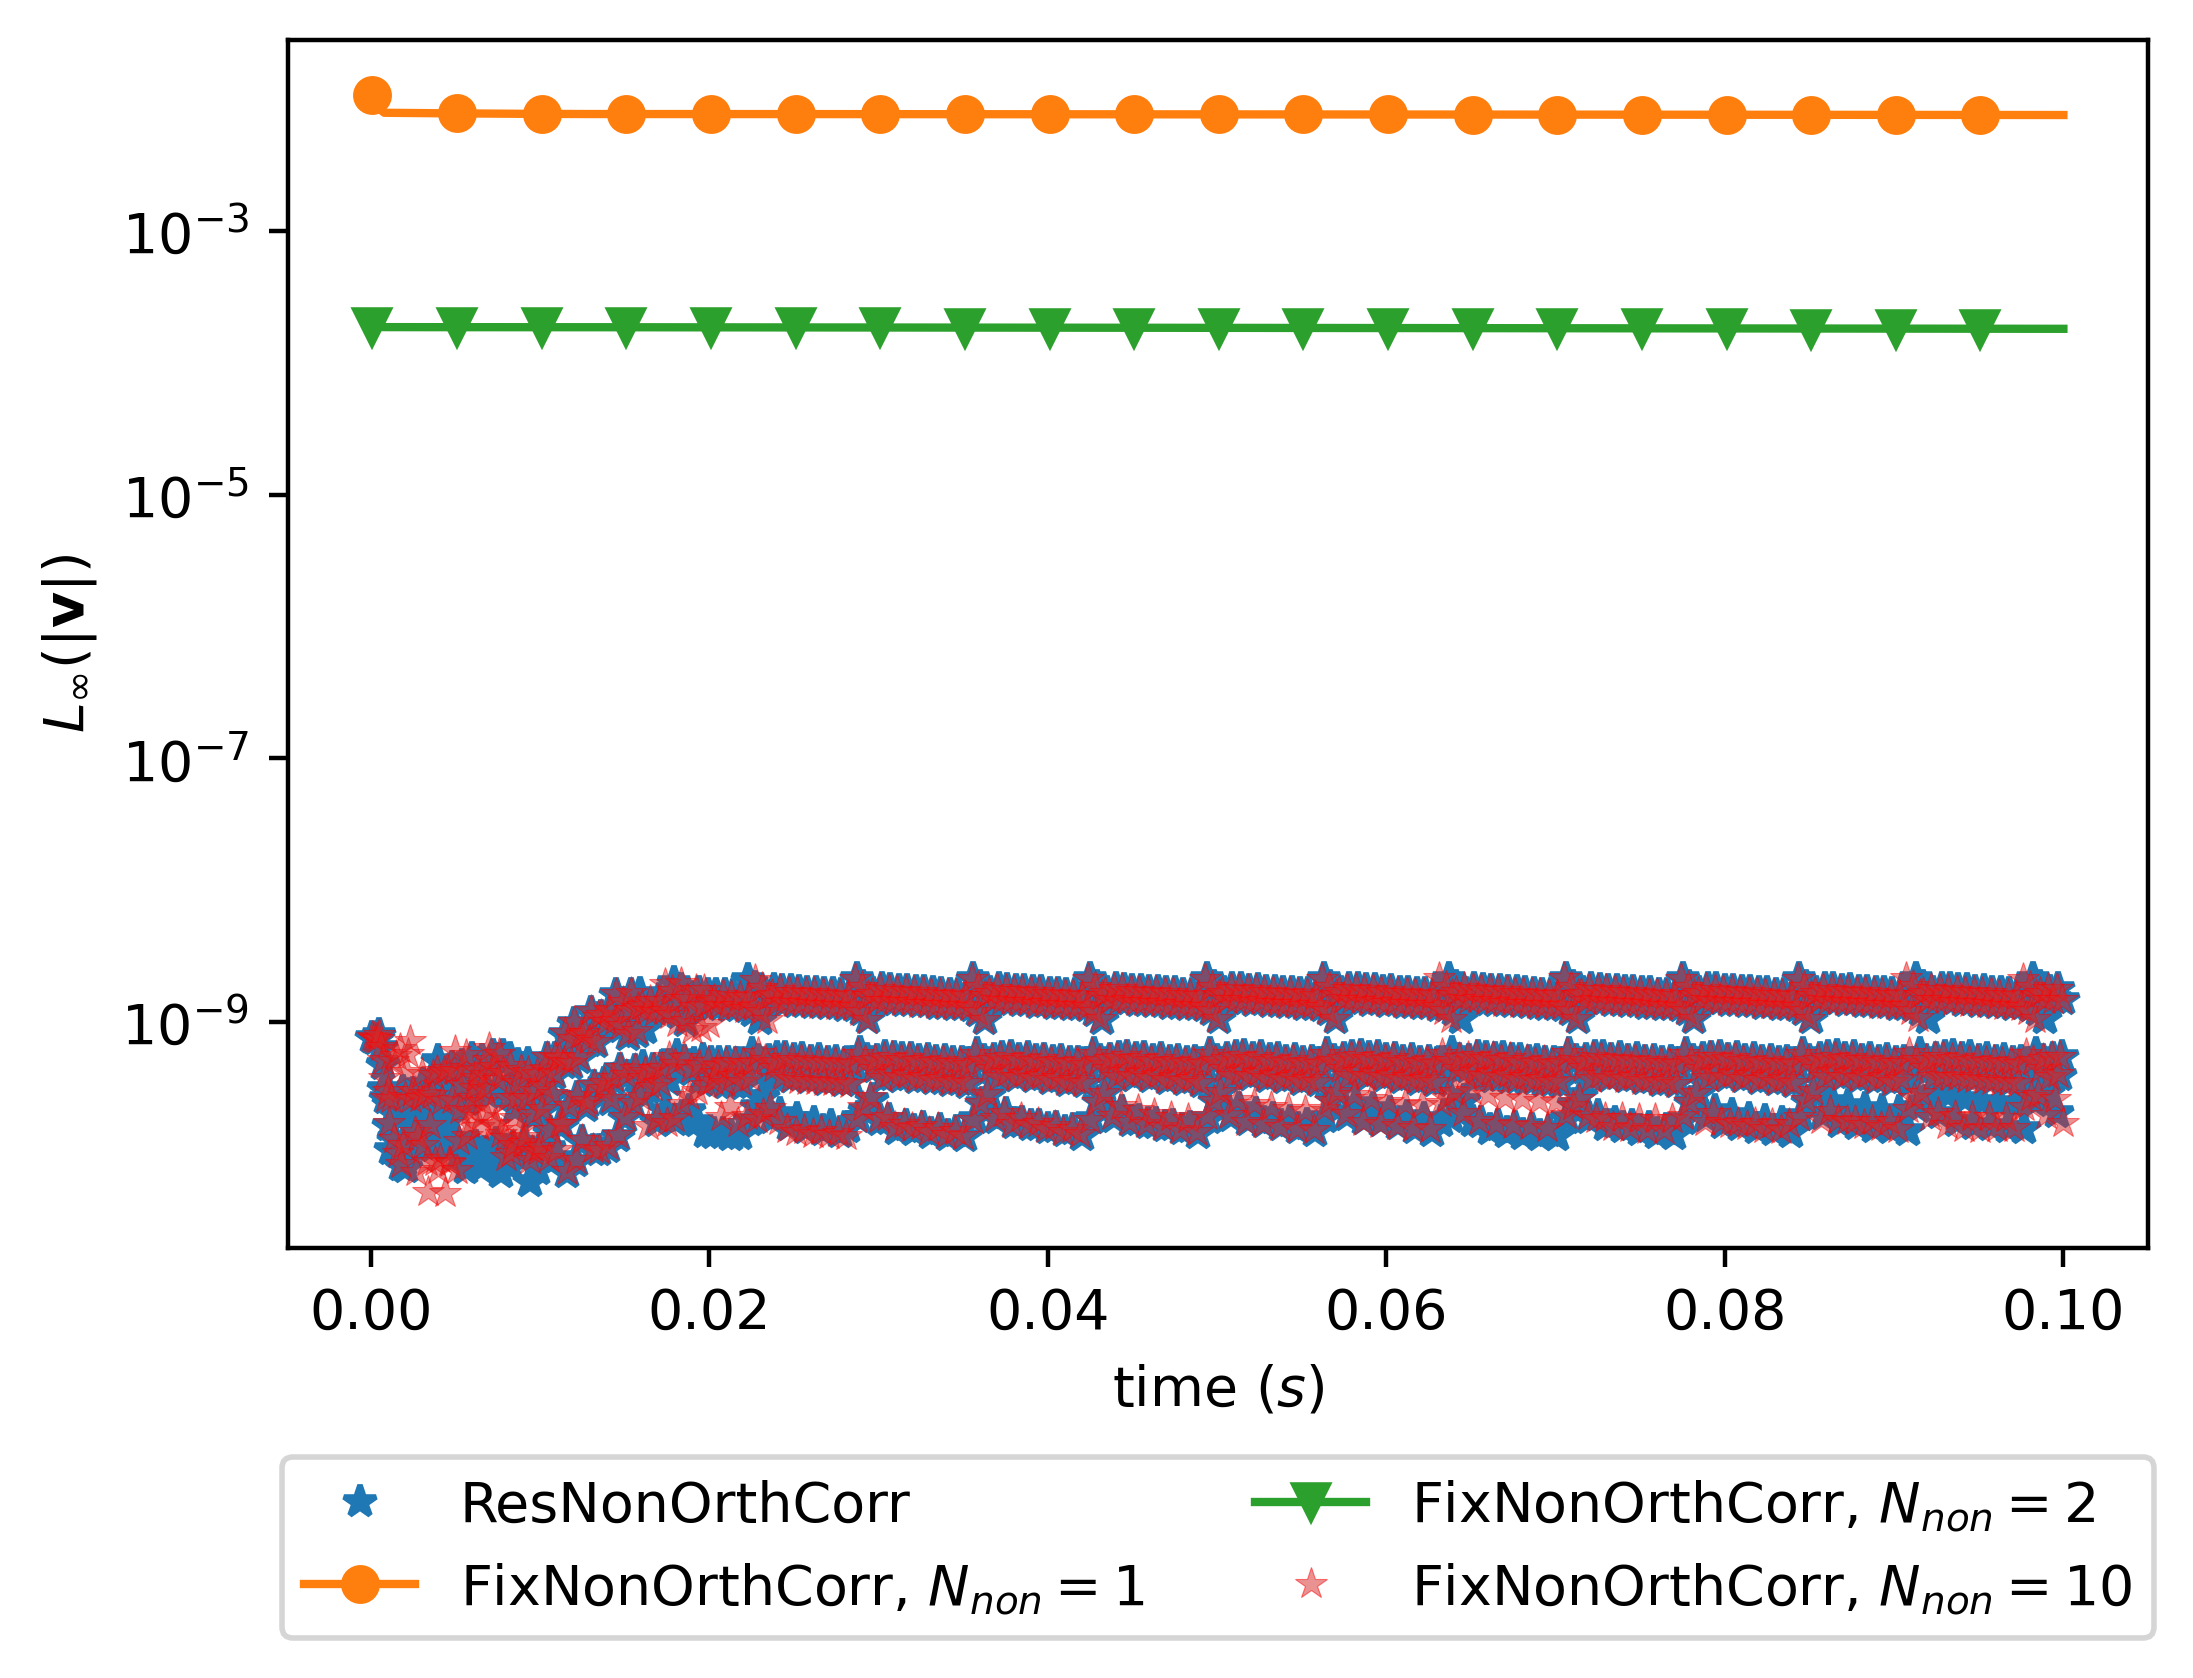

In [6]:
dfN30_ERCNOC = dframe_magU_full.loc[(0,'ERCNOC','polyMesh',30),:]
dfN30_PIMPLE1 = dframe_magU_full.loc[(0,'PIMPLE','polyMesh',30),:]
dfN30_PIMPLE2 = dframe_magU_full.loc[(1,'PIMPLE','polyMesh',30),:]
dfN30_PIMPLE5 = dframe_magU_full.loc[(4,'PIMPLE','polyMesh',30),:]
dfN30_PIMPLE10 = dframe_magU_full.loc[(9,'PIMPLE','polyMesh',30),:]
#['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.plot(dfN30_ERCNOC["Time"],dfN30_ERCNOC["max(U)"], marker='*',linestyle='None',label="ResNonOrthCorr") #, marker='+',markevery=50)
plt.plot(dfN30_PIMPLE1["Time"],dfN30_PIMPLE1["max(U)"], label=r"FixNonOrthCorr, $N_{non}=1$", marker='o',markevery=50)
plt.plot(dfN30_PIMPLE2["Time"],dfN30_PIMPLE2["max(U)"], label=r"FixNonOrthCorr, $N_{non}=2$", marker='v',markevery=50)
plt.plot(dfN30_PIMPLE10["Time"],dfN30_PIMPLE10["max(U)"], label=r"FixNonOrthCorr, $N_{non}=10$", marker='*',markevery=1,
         #markerfacecolor="None",
         markeredgecolor='red', 
         markeredgewidth=0.2, 
         linestyle='None',
         alpha=0.5)

#plt.title("static sphere; %s" % (Type))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)#,
      #fancybox=True, shadow=True, ncol=1)
#plt.legend()
plt.yscale("log")
plt.xlabel(r"time $(s)$")
plt.ylabel(r"$L_{\infty}(|\mathbf{v}|)$")
plt.show()

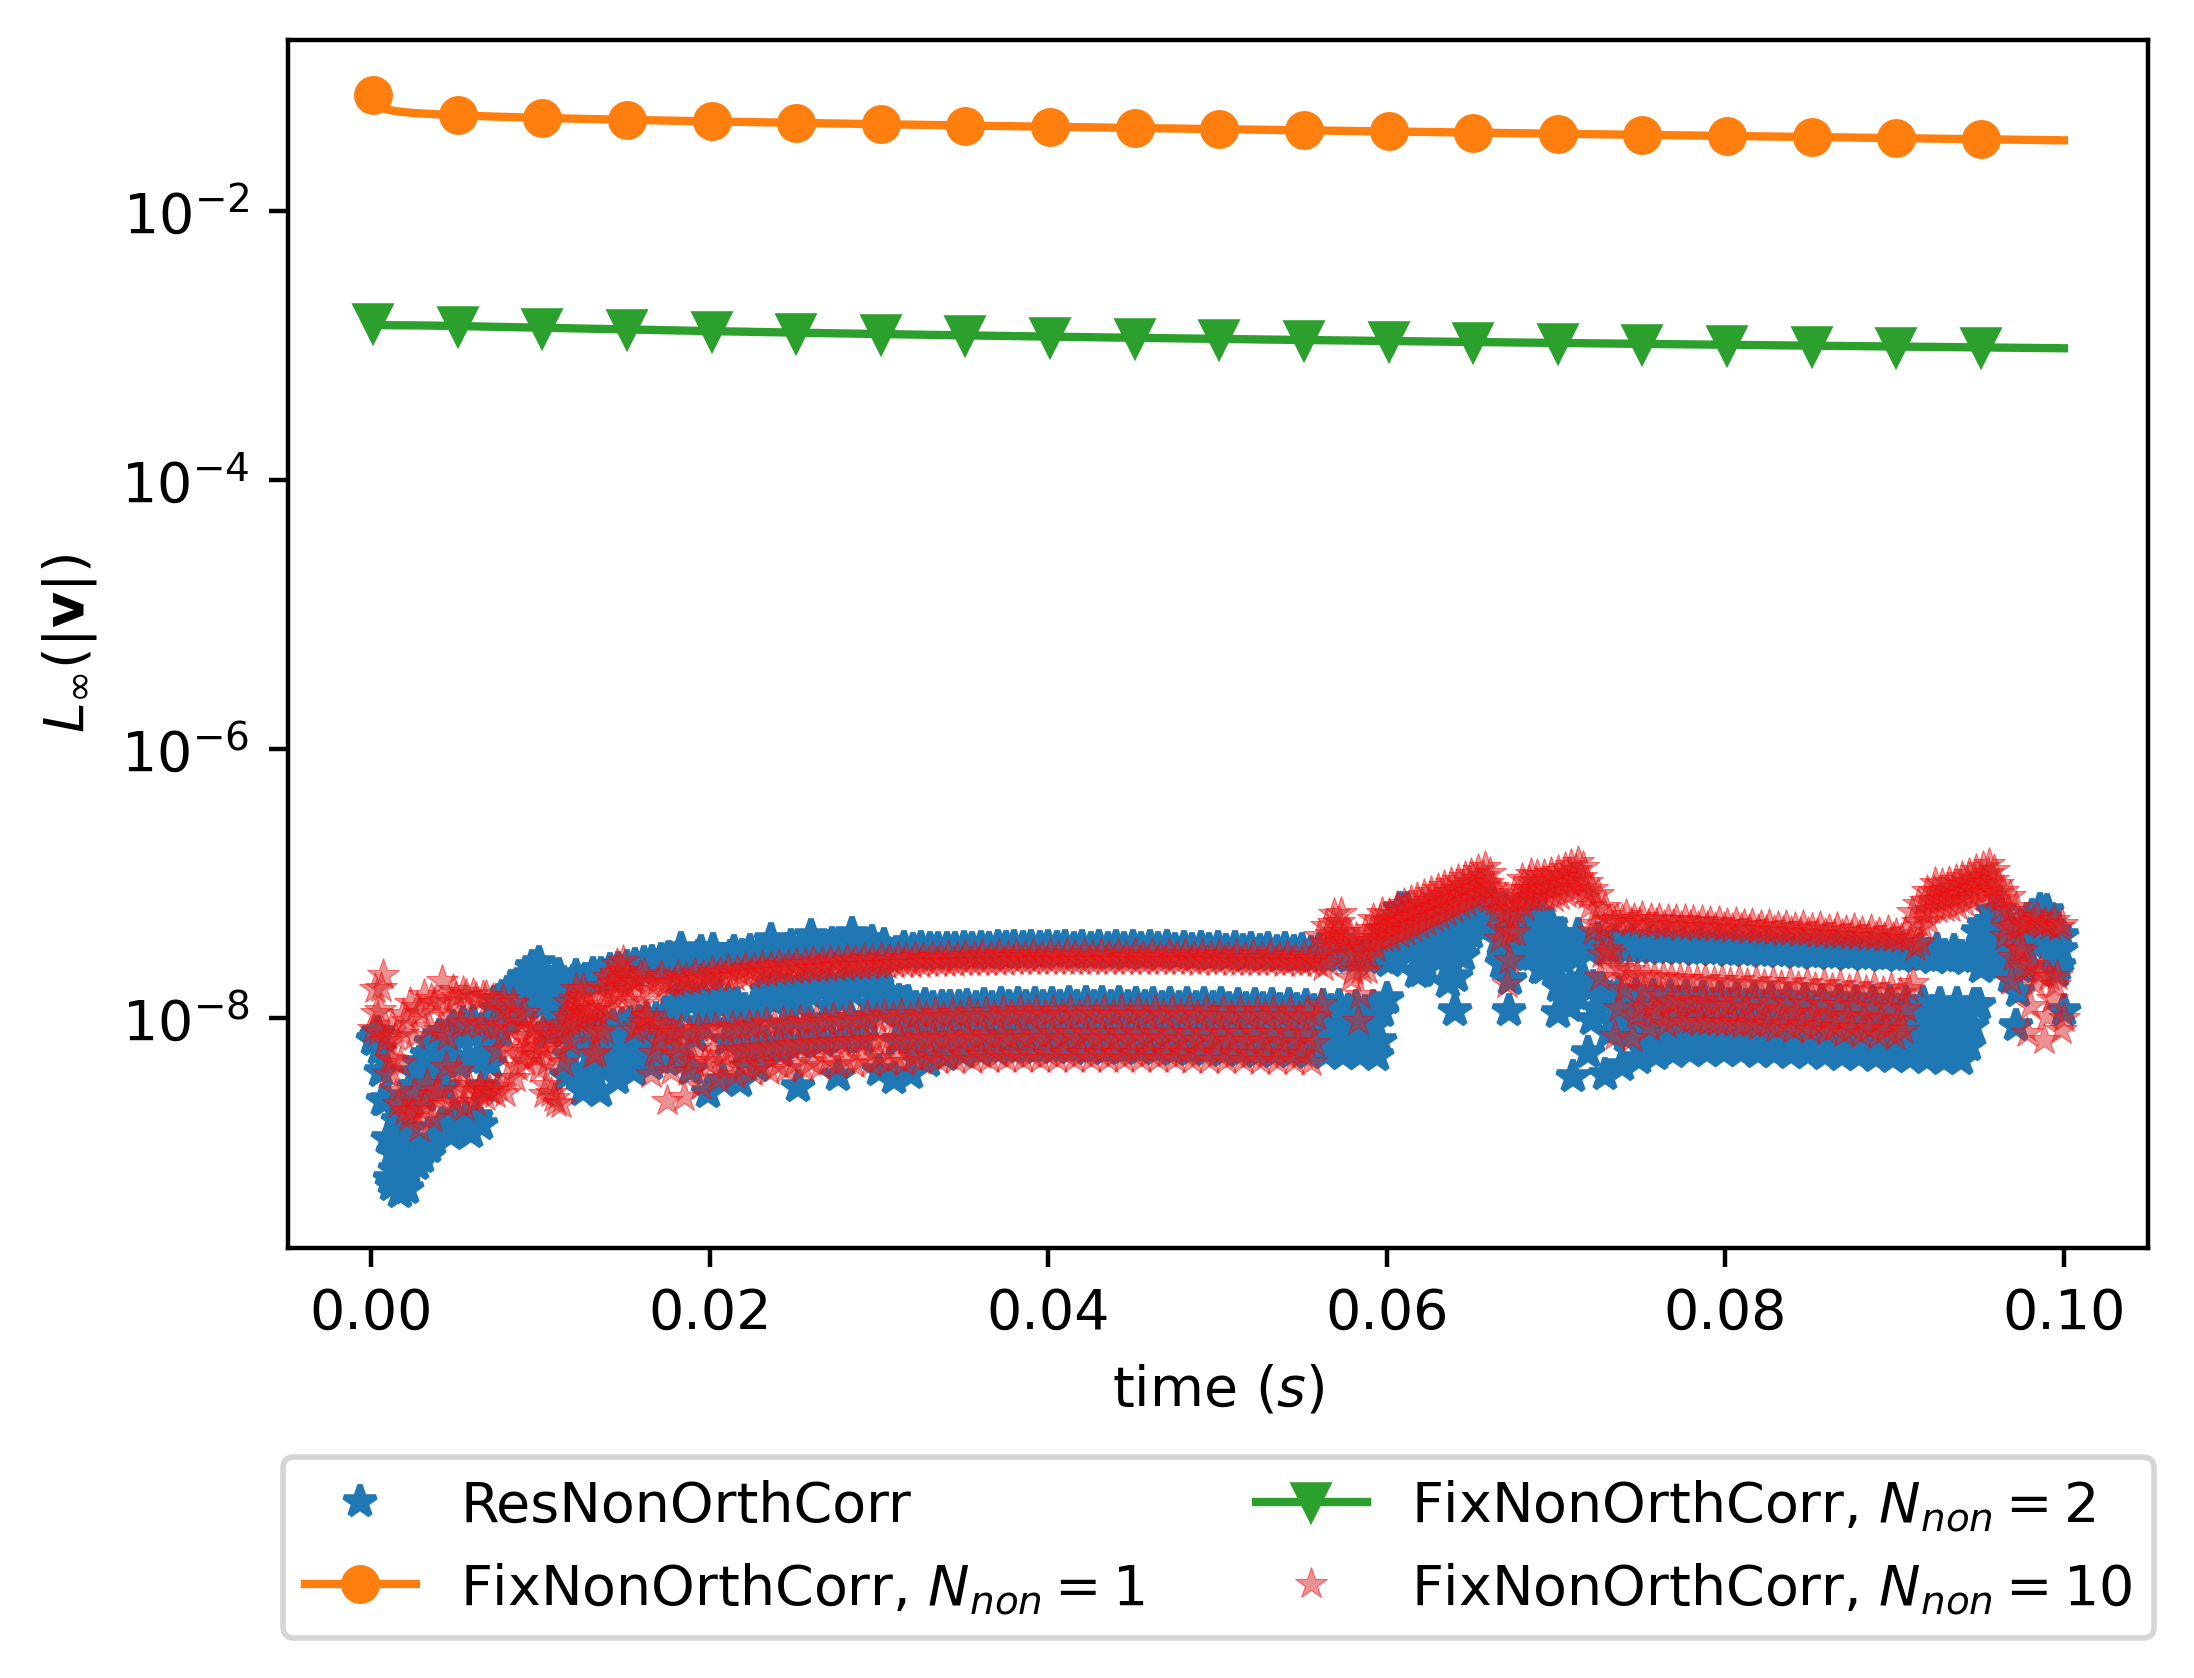

In [7]:
dfN30_ERCNOC = dframe_magU_full.loc[(0,'ERCNOC','polyMesh',60),:]
dfN30_PIMPLE1 = dframe_magU_full.loc[(0,'PIMPLE','polyMesh',60),:]
dfN30_PIMPLE2 = dframe_magU_full.loc[(1,'PIMPLE','polyMesh',60),:]
dfN30_PIMPLE5 = dframe_magU_full.loc[(4,'PIMPLE','polyMesh',60),:]
dfN30_PIMPLE10 = dframe_magU_full.loc[(9,'PIMPLE','polyMesh',60),:]
#['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.plot(dfN30_ERCNOC["Time"],dfN30_ERCNOC["max(U)"], marker='*',linestyle='None',label="ResNonOrthCorr") #, marker='+',markevery=50)
plt.plot(dfN30_PIMPLE1["Time"],dfN30_PIMPLE1["max(U)"], label=r"FixNonOrthCorr, $N_{non}=1$", marker='o',markevery=50)
plt.plot(dfN30_PIMPLE2["Time"],dfN30_PIMPLE2["max(U)"], label=r"FixNonOrthCorr, $N_{non}=2$", marker='v',markevery=50)
plt.plot(dfN30_PIMPLE10["Time"],dfN30_PIMPLE10["max(U)"], label=r"FixNonOrthCorr, $N_{non}=10$", marker='*',markevery=1,
         #markerfacecolor="None",
         markeredgecolor='red', 
         markeredgewidth=0.2, 
         linestyle='None',
         alpha=0.5)

#plt.title("static sphere; %s" % (Type))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)#,
      #fancybox=True, shadow=True, ncol=1)
#plt.legend()
plt.yscale("log")
plt.xlabel(r"time $(s)$")
plt.ylabel(r"$L_{\infty}(|\mathbf{v}|)$")
plt.show()

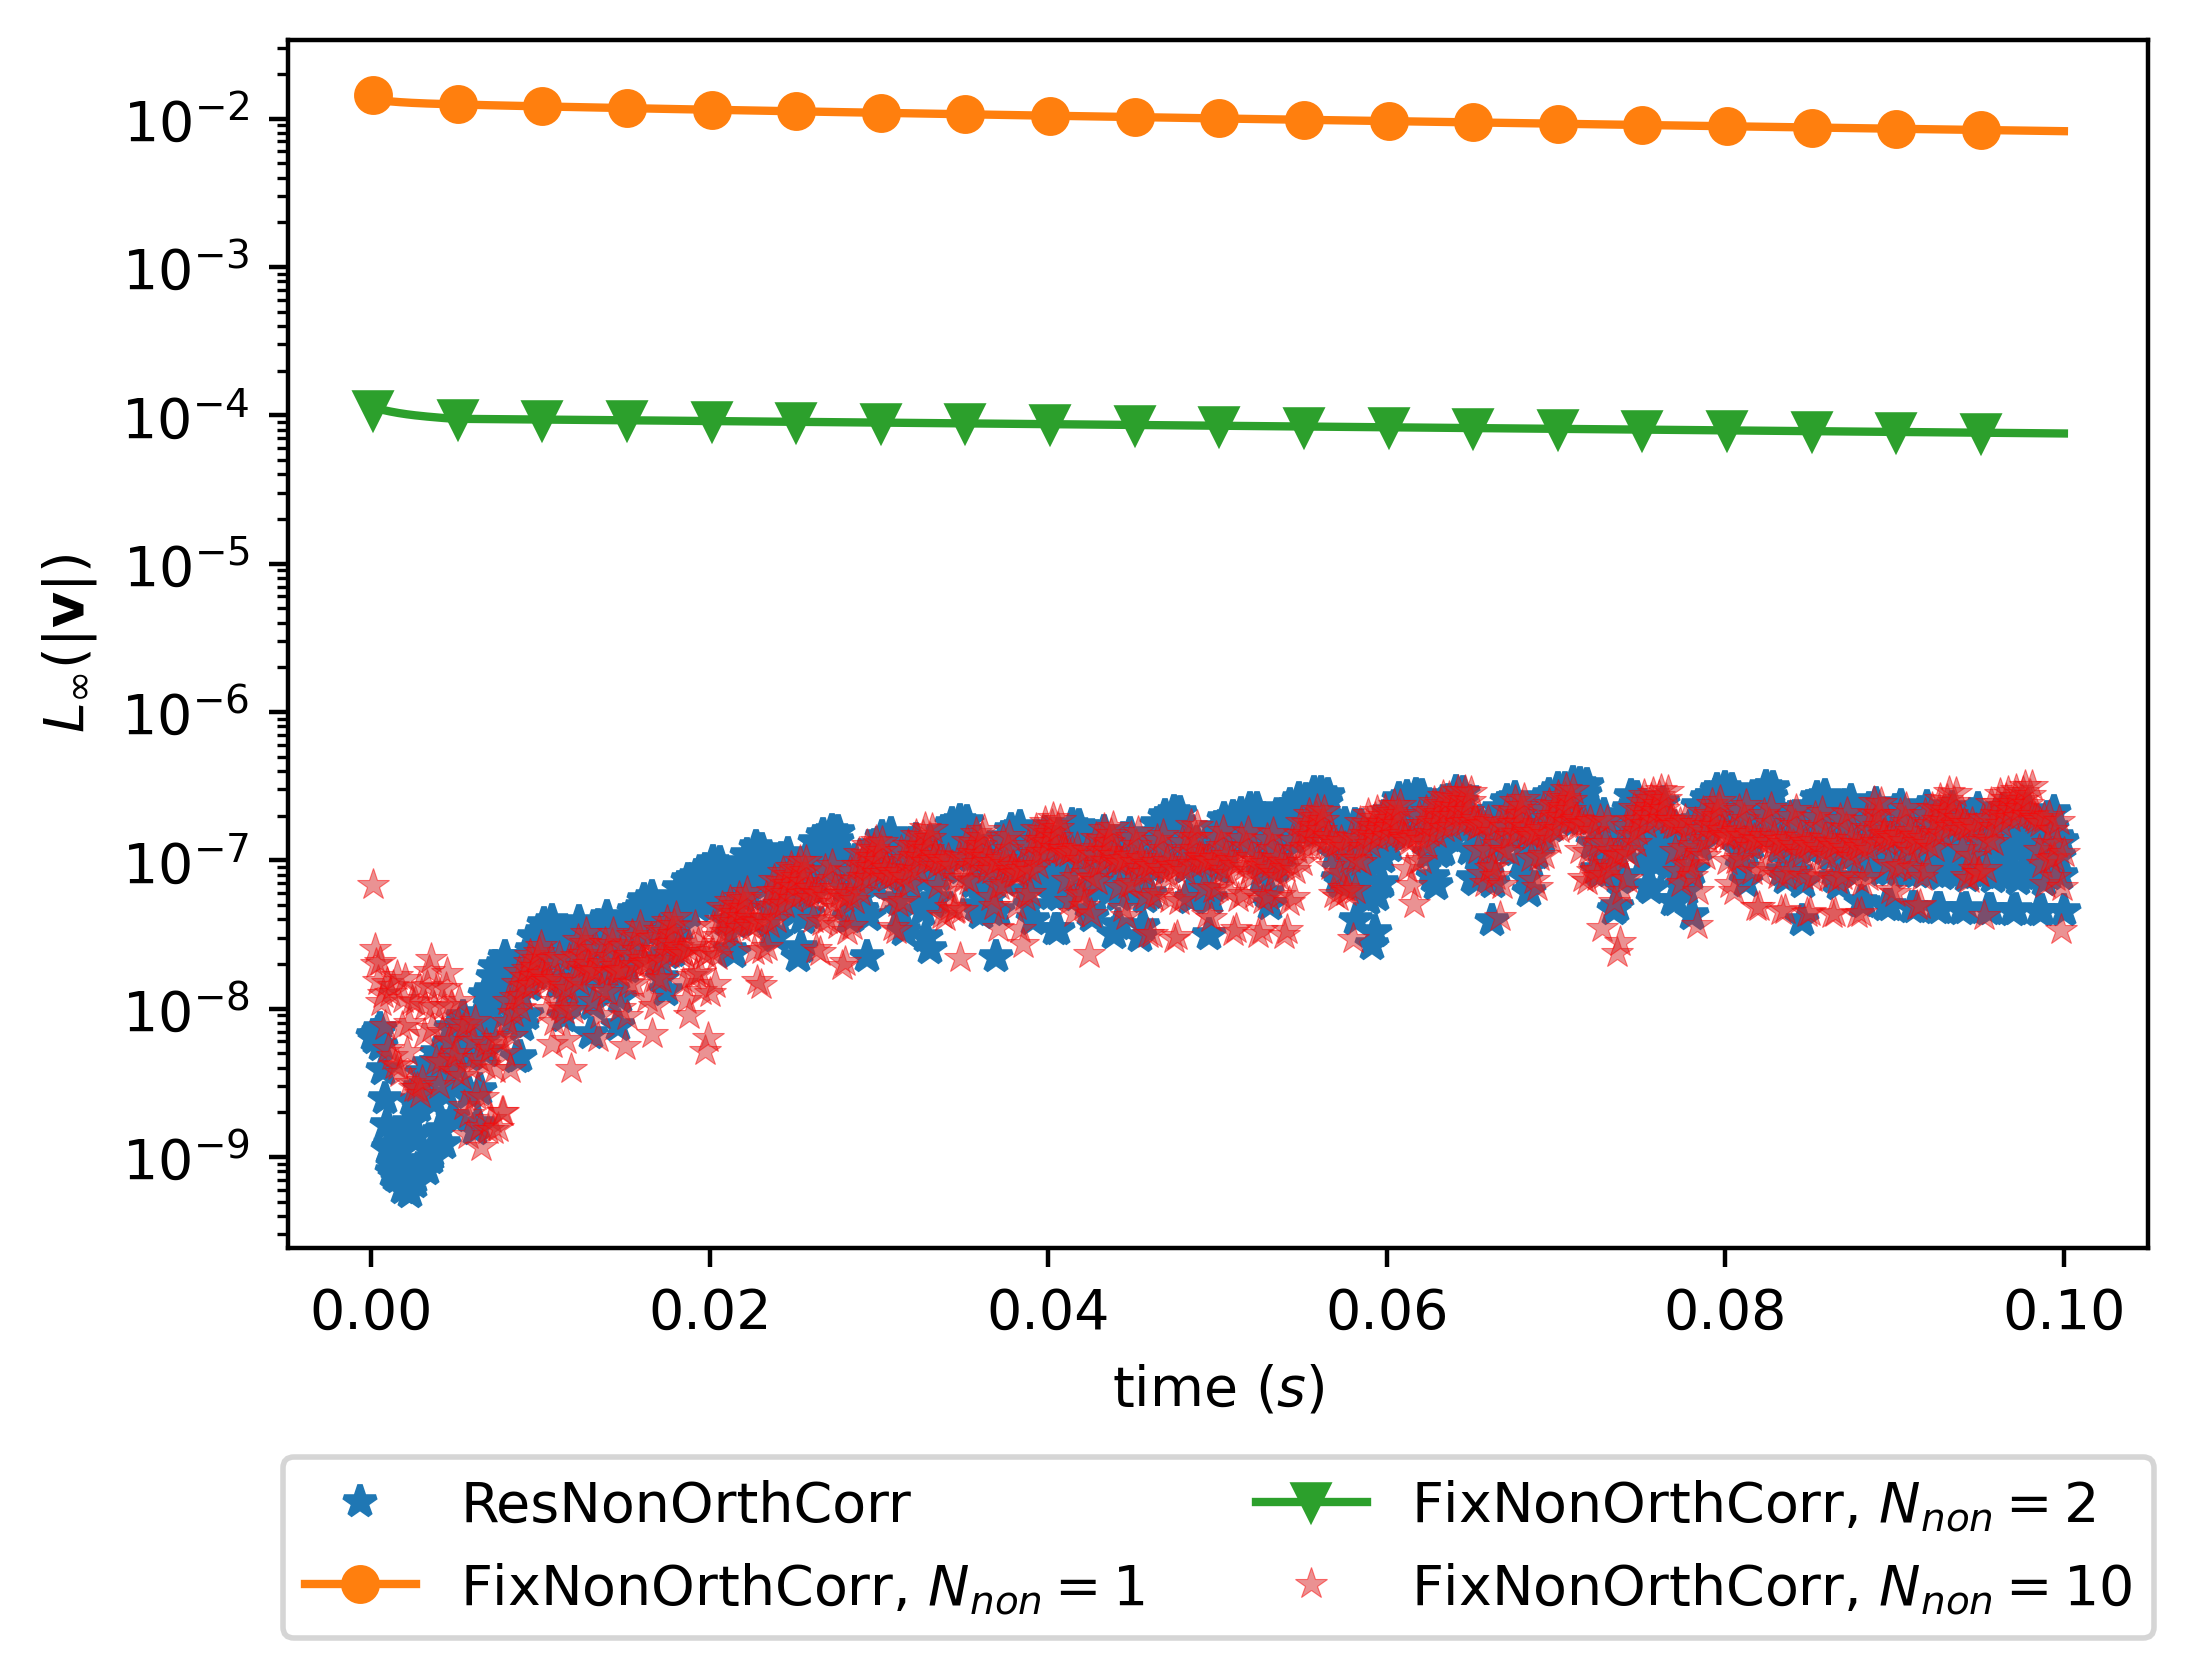

In [8]:
dfN30_ERCNOC = dframe_magU_full.loc[(0,'ERCNOC','polyMesh',90),:]
dfN30_PIMPLE1 = dframe_magU_full.loc[(0,'PIMPLE','polyMesh',90),:]
dfN30_PIMPLE2 = dframe_magU_full.loc[(1,'PIMPLE','polyMesh',90),:]
dfN30_PIMPLE5 = dframe_magU_full.loc[(4,'PIMPLE','polyMesh',90),:]
dfN30_PIMPLE10 = dframe_magU_full.loc[(9,'PIMPLE','polyMesh',90),:]
#['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
plt.plot(dfN30_ERCNOC["Time"],dfN30_ERCNOC["max(U)"], marker='*',linestyle='None',label="ResNonOrthCorr") #, marker='+',markevery=50)
plt.plot(dfN30_PIMPLE1["Time"],dfN30_PIMPLE1["max(U)"], label=r"FixNonOrthCorr, $N_{non}=1$", marker='o',markevery=50)
plt.plot(dfN30_PIMPLE2["Time"],dfN30_PIMPLE2["max(U)"], label=r"FixNonOrthCorr, $N_{non}=2$", marker='v',markevery=50)
plt.plot(dfN30_PIMPLE10["Time"],dfN30_PIMPLE10["max(U)"], label=r"FixNonOrthCorr, $N_{non}=10$", marker='*',markevery=1,
         #markerfacecolor="None",
         markeredgecolor='red', 
         markeredgewidth=0.2, 
         linestyle='None',
         alpha=0.5)
#plt.title("static sphere; %s" % (Type))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)#,
      #fancybox=True, shadow=True, ncol=1)
#plt.legend()
plt.yscale("log")
plt.xlabel(r"time $(s)$")
plt.ylabel(r"$L_{\infty}(|\mathbf{v}|)$")
plt.show()

In [ ]:
df = dframe_magU_full.loc[(0, "PIMPLE",meshType, resolution),:]

In [26]:
agglomerator = da.data_agglomerator("pM.parameter","postProcessing/fieldMinMax/0/fieldMinMax.dat", 
                                     "./modifiedPolyMesh-pM_00000_template")
agglomerator.show_failed_variations()
agglomerator.write_agglomerated_study_data("modifiedPolyMesh-tiltedBox3D.csv")
dframe_magU_PM = agglomerator.study_dataframe()
dframe_magU_PM = dframe_magU_PM.sort_index()

Variants without valid data:
----------------------------
#Variation | Reason
----------------------------
[[0, 1, 4, 9], ['ERCNOC', 'PIMPLE'], ['polyMesh'], [30, 60, 90], [0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]]
['nNonOrthog', 'nonOrthogControl', 'meshType', 'resolution', 'yRotateDeg', 'step']


In [27]:
dframe_magU_PM

Time  min(U)        max(U)  \
nNonOrthog nonOrthogControl resolution step                                 
0          ERCNOC           30         0     0.0001     0.0  1.477833e-09   
                                       1     0.0002     0.0  1.522261e-09   
                                       2     0.0003     0.0  1.566966e-09   
                                       3     0.0004     0.0  1.611280e-09   
                                       4     0.0005     0.0  1.363432e-09   
...                                             ...     ...           ...   
9          PIMPLE           90         995   0.0996     0.0  1.271899e-07   
                                       996   0.0997     0.0  6.444838e-08   
                                       997   0.0998     0.0  1.040022e-07   
                                       998   0.0999     0.0  6.403588e-08   
                                       999   0.1000     0.0  5.159276e-08   

                                               min(p_rgh)   max(p_rgh)  
nNonOrthog nonOrthogControl resolution step                             
0          ERCNOC           30         0    -5.224766e-10  5032.153738  
                                       1    -3.626872e-08  5032.153738  
                                       2    -3.626872e-08  5032.153738  
                                       3    -3.626872e-08  5032.153738  
                                       4    -1.144522e-07  5032.153737  
...                                                   ...          ...  
9          PIMPLE           90         995  -1.550612e-06  5032.153743  
                                       996  -2.901024e-06  5032.153747  
                                       997  -2.901024e-06  5032.153747  
                                       998  -2.406737e-06  5032.153750  
                                       999  -2.308049e-06  5032.153743  

[24000 rows x 5 columns]

In [28]:
def plot_magU_modiPoly(dframe, meshType, Nnon):
    resolutions = dframe.index.get_level_values("resolution").unique()
    nonOrthogControls =dframe.index.get_level_values("nonOrthogControl").unique()
    meshs = [meshType]
    #gravityModels = ['gravityReconImprove'] #dframe.index.get_level_values("gravityModel").unique()#[gravityModel] #['gravityRecon', 'gravityReconImprove', 'gravityReconImproveCP'] #
    Nnons = [Nnon]#dframe.index.get_level_values("nNonOrthog").unique()#['gravity', 'gravityDirac', 'gravityRecon']
    #marker_list = list(Line2D.markers.keys()) #['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
    

    for resolution in resolutions:
        for mesh in meshs:
            for nonOrthogControl in nonOrthogControls:
                for N in Nnons:
                    #df = dframe.loc[(model,nonOrthogControl,meshType),:]
                    df = dframe.loc[(N, nonOrthogControl, resolution),:]
                    plt.plot(df["Time"],df["max(U)"], label="controlMethod %s; N %s" % (nonOrthogControl,resolution))#, marker=marker)

    plt.title("Water Column: %s, Nnon %s" % (meshType, N))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=1)
    plt.xlabel(r"time $(s)$")
    plt.ylabel(r"max $(|\mathbf{v}|)$")
    plt.yscale("log")
    plt.show()

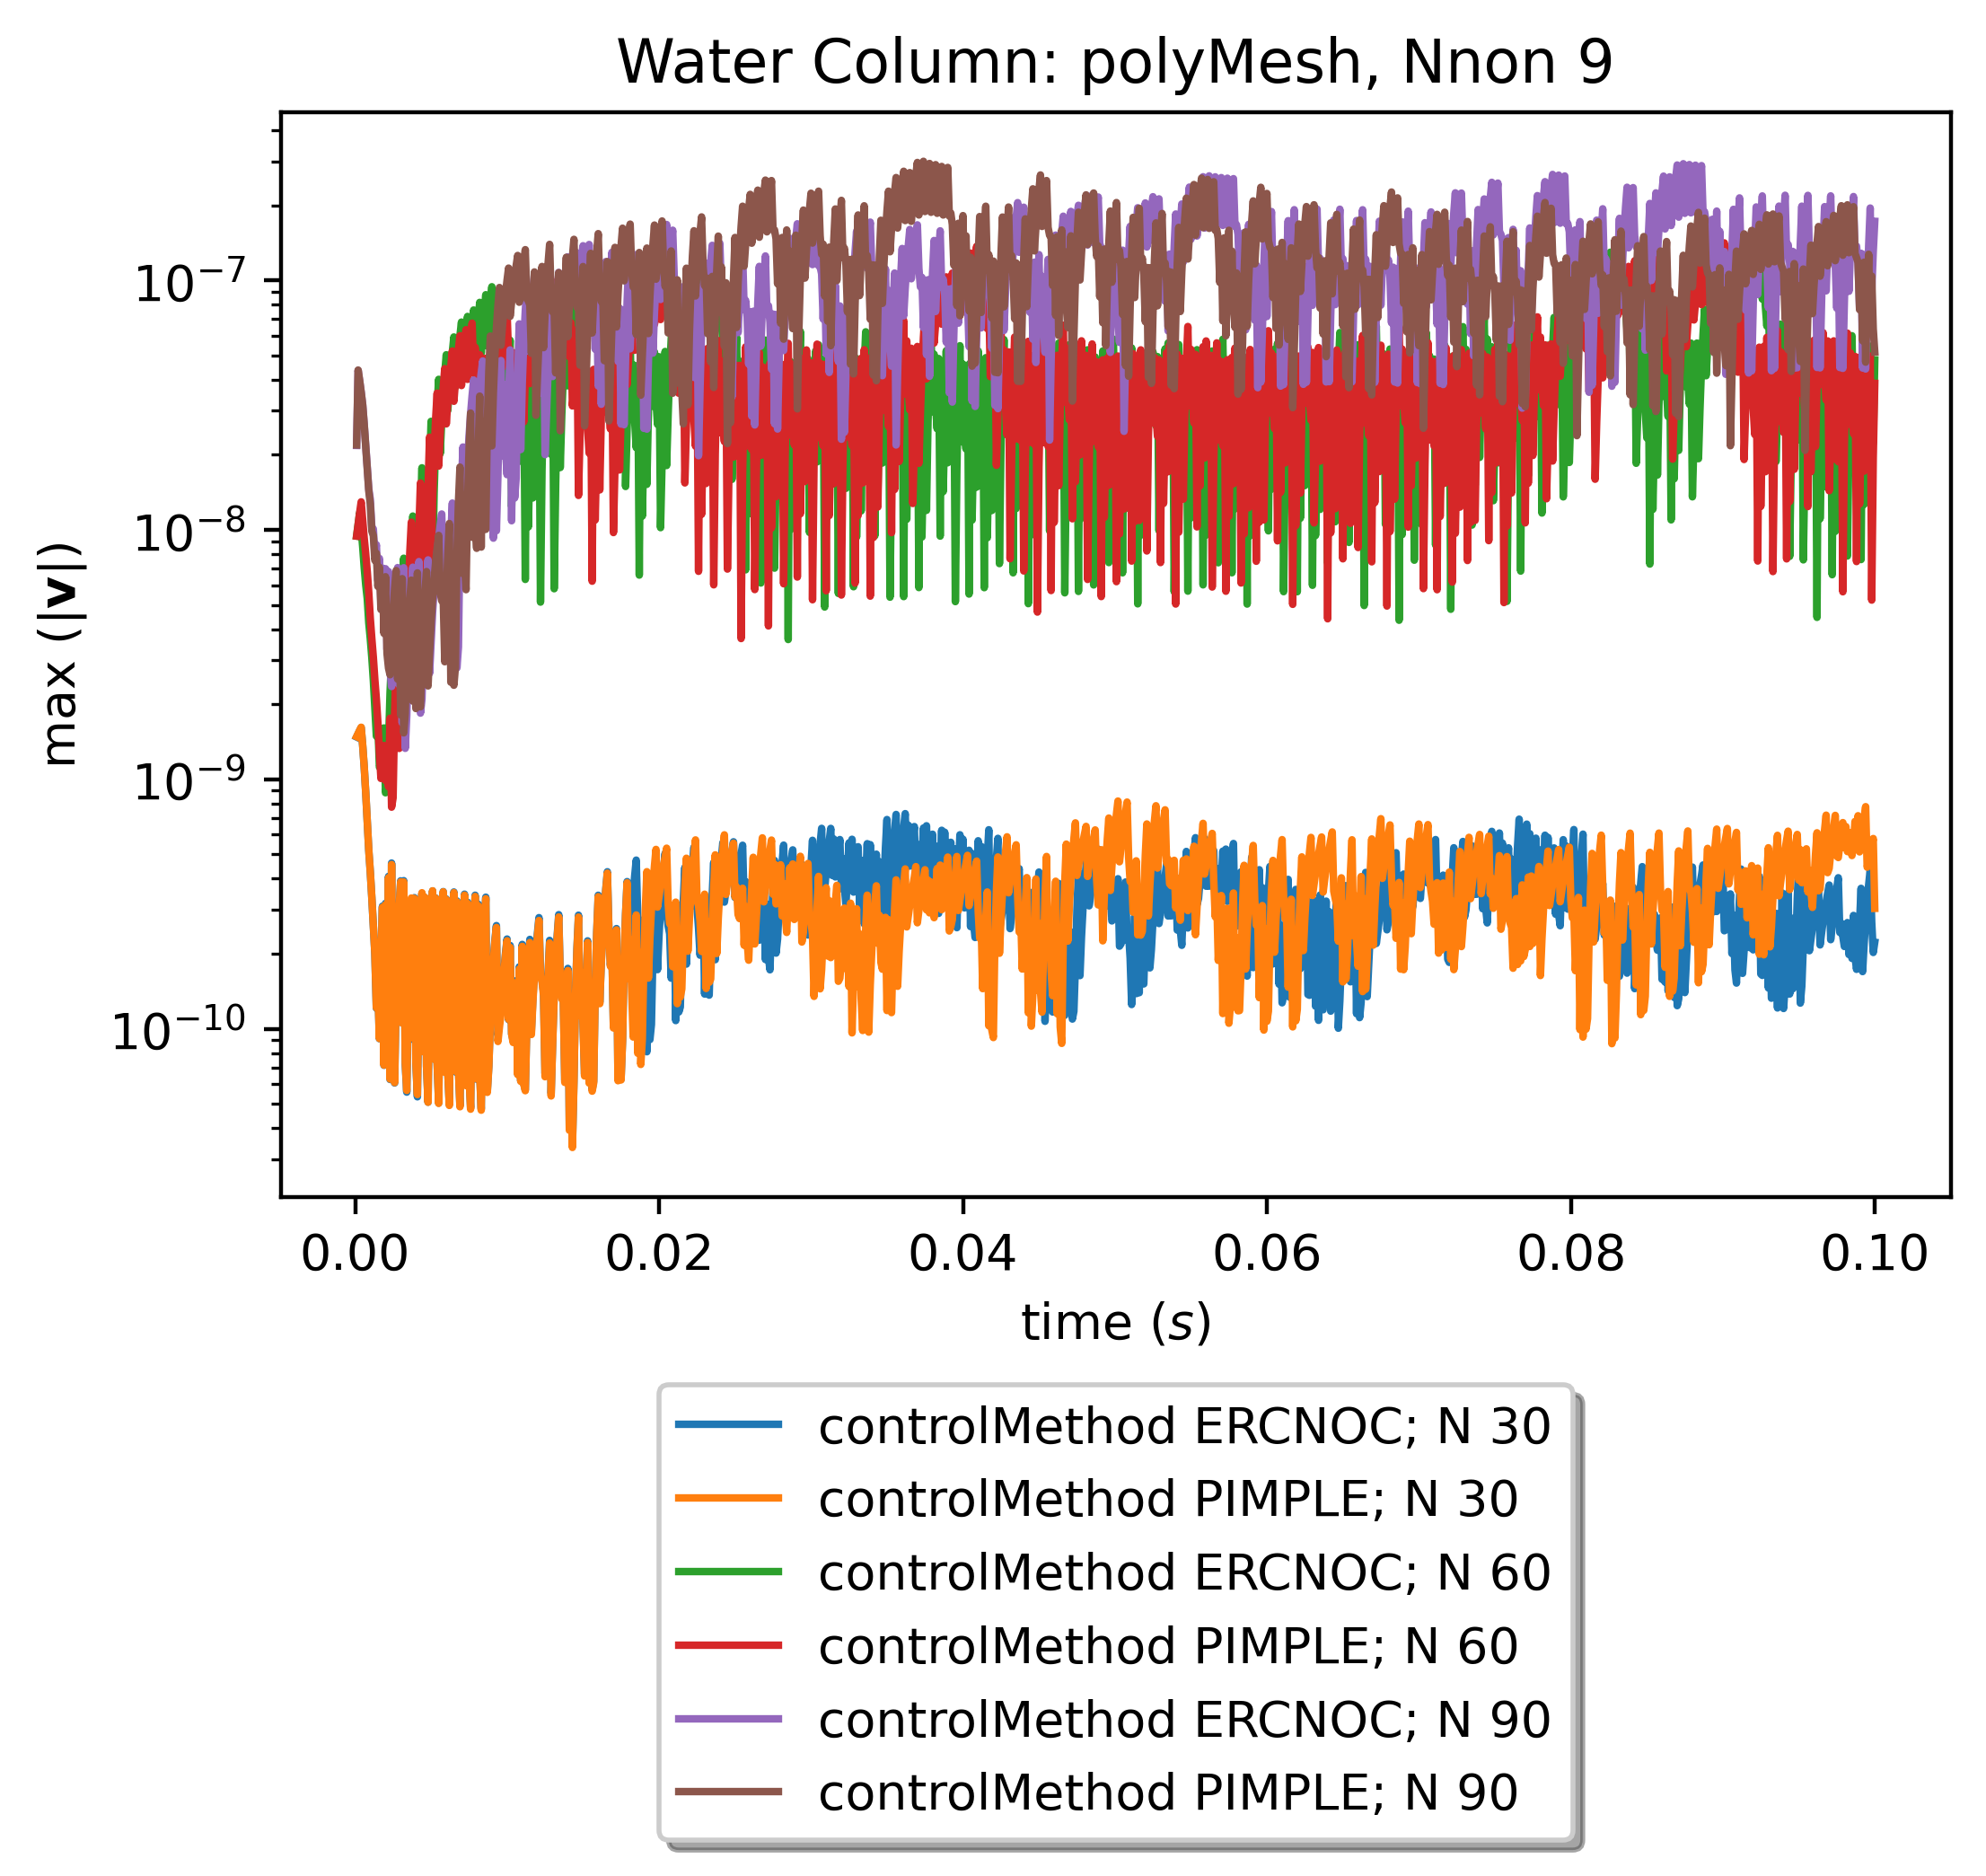

In [31]:
plot_magU_modiPoly(dframe_magU_PM,"polyMesh",9)